In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
año_a_cargar = 2024 #Rango desde 2009 hasta 2024 (considera en 2024 meses hasta Junio)
mes_a_cargar = 6 #1-enero, 2-febrero, 3-marzo, ...
taxy_type = 'yellow' #yellow, green or fhv

In [9]:
def carga_data_taxy_trip(año_a_cargar, mes_a_cargar, taxy_type):
    '''
        Función que carga datos desde la pagina oficial de nueva york y retorna un dataframe con los datos de calidad de aire
        Recibe año y mes a cargar
        Retorna dataframe con datos cargados
    '''
    try:
        if not (2009 <= año_a_cargar <= 2024) or not (1 <= mes_a_cargar <= 12):
            raise ValueError("El año o mes no está dentro del rango permitido")
    except ValueError as e:
            print(e)
    else:
        #print("El año y mes están dentro del rango permitido")
        url = f"https://d37ci6vzurychx.cloudfront.net/trip-data/{taxy_type}_tripdata_{año_a_cargar}-{int(mes_a_cargar):02d}.parquet"
        print(url)
        df = pd.read_parquet(url)
    return df

In [10]:
df = carga_data_taxy_trip(año_a_cargar, mes_a_cargar, taxy_type)

https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-06.parquet


In [11]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-06-01 00:03:46,2024-06-01 00:31:23,1.0,12.50,1.0,N,138,195,1,48.50,7.75,0.5,11.55,0.0,1.0,69.30,0.0,1.75
1,2,2024-06-01 00:55:22,2024-06-01 01:08:24,1.0,4.34,1.0,N,138,7,1,20.50,6.00,0.5,8.40,0.0,1.0,38.15,0.0,1.75
2,1,2024-06-01 00:23:53,2024-06-01 00:32:35,1.0,1.30,1.0,N,166,41,1,10.00,1.00,0.5,3.10,0.0,1.0,15.60,0.0,0.00
3,1,2024-06-01 00:32:24,2024-06-01 00:40:06,1.0,1.20,1.0,N,148,114,1,8.60,3.50,0.5,0.20,0.0,1.0,13.80,2.5,0.00
4,1,2024-06-01 00:51:38,2024-06-01 00:58:17,1.0,1.00,1.0,N,148,249,1,7.20,3.50,0.5,2.00,0.0,1.0,14.20,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539188,2,2024-06-30 23:07:36,2024-06-30 23:18:35,NaN,2.51,NaN,None,255,148,0,21.09,0.00,0.5,0.00,0.0,1.0,25.09,NaN,NaN
3539189,2,2024-06-30 23:46:07,2024-07-01 00:11:53,NaN,7.55,NaN,None,68,74,0,33.96,0.00,0.5,0.00,0.0,1.0,37.96,NaN,NaN
3539190,2,2024-06-30 23:18:50,2024-06-30 23:35:09,NaN,4.25,NaN,None,41,100,0,21.01,0.00,0.5,0.00,0.0,1.0,25.01,NaN,NaN
3539191,1,2024-06-30 23:33:36,2024-06-30 23:42:37,NaN,1.60,NaN,None,158,231,0,14.41,0.00,0.5,0.00,0.0,1.0,18.41,NaN,NaN


In [12]:
df[df['RatecodeID'] == 99]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
60,1,2024-06-01 00:52:25,2024-06-01 01:51:24,1.0,11.1,99.0,N,161,197,1,39.5,0.0,0.5,0.0,6.94,1.0,47.94,0.0,0.0
1908,1,2024-06-01 00:06:18,2024-06-01 00:37:54,1.0,10.6,99.0,N,226,130,1,37.5,0.0,0.5,0.0,0.00,1.0,39.00,0.0,0.0
5749,1,2024-06-01 01:48:58,2024-06-01 01:48:58,0.0,0.0,99.0,Y,144,264,3,15.0,0.0,0.0,0.0,0.00,0.0,15.00,0.0,0.0
14022,1,2024-06-01 03:53:31,2024-06-01 04:27:01,1.0,13.6,99.0,N,219,193,1,45.5,0.0,0.5,0.0,0.00,1.0,47.00,0.0,0.0
14837,1,2024-06-01 04:13:25,2024-06-01 04:56:17,1.0,11.0,99.0,N,18,140,1,37.5,0.0,0.5,0.0,0.00,0.0,38.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3123994,1,2024-06-30 22:50:27,2024-06-30 23:02:30,1.0,5.5,99.0,N,241,116,1,34.5,0.0,0.5,0.0,0.00,1.0,36.00,0.0,0.0
3125757,1,2024-06-30 22:55:00,2024-06-30 22:55:00,0.0,0.0,99.0,Y,158,264,3,20.7,0.0,0.0,0.0,0.00,0.0,20.70,0.0,0.0
3125796,2,2024-06-30 22:54:30,2024-06-30 23:40:12,1.0,0.0,99.0,N,68,68,3,0.0,0.0,-0.5,0.0,0.00,-1.0,-4.00,-2.5,0.0
3125797,2,2024-06-30 22:54:30,2024-06-30 23:40:12,1.0,0.0,99.0,N,68,75,3,0.0,0.0,0.5,0.0,0.00,1.0,4.00,2.5,0.0


In [13]:
df[df['PULocationID'] == df['PULocationID'].min()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
16304,2,2024-06-01 06:34:06,2024-06-01 06:37:02,4.0,0.00,5.0,N,1,1,1,118.55,0.0,0.0,23.91,0.00,1.0,143.46,0.0,0.0
45673,2,2024-06-01 14:13:35,2024-06-01 14:13:44,3.0,0.00,5.0,N,1,1,1,110.00,0.0,0.0,27.75,0.00,1.0,138.75,0.0,0.0
48424,2,2024-06-01 14:56:58,2024-06-01 14:57:06,4.0,0.00,5.0,N,1,1,1,120.00,0.0,0.0,10.00,0.00,1.0,131.00,0.0,0.0
50386,2,2024-06-01 14:09:43,2024-06-01 14:09:59,1.0,0.00,5.0,N,1,1,1,100.00,0.0,0.0,10.00,20.00,1.0,131.00,0.0,0.0
51815,2,2024-06-01 14:22:06,2024-06-01 14:22:14,4.0,0.00,5.0,N,1,1,1,120.00,0.0,0.0,12.00,0.00,1.0,133.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124488,2,2024-06-30 22:29:17,2024-06-30 22:29:22,1.0,0.00,1.0,N,1,1,1,3.00,1.0,0.0,15.00,0.00,1.0,20.00,0.0,0.0
3182866,2,2024-06-05 05:27:32,2024-06-05 05:28:10,NaN,0.00,NaN,None,1,1,0,81.95,0.0,0.0,17.96,13.38,1.0,114.29,NaN,NaN
3274765,2,2024-06-09 17:01:48,2024-06-09 17:02:39,NaN,0.00,NaN,None,1,1,0,74.73,0.0,0.0,15.15,0.00,1.0,90.88,NaN,NaN
3353168,2,2024-06-16 16:10:49,2024-06-16 17:38:28,NaN,20.69,NaN,None,1,1,0,74.50,0.0,0.0,2.00,15.38,1.0,92.88,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539193 entries, 0 to 3539192
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [15]:
# Obtener el conteo de nulos por columna de df
null_count = df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                        Nulos  Porcentaje
VendorID                    0    0.000000
tpep_pickup_datetime        0    0.000000
tpep_dropoff_datetime       0    0.000000
passenger_count        410781   11.606629
trip_distance               0    0.000000
RatecodeID             410781   11.606629
store_and_fwd_flag     410781   11.606629
PULocationID                0    0.000000
DOLocationID                0    0.000000
payment_type                0    0.000000
fare_amount                 0    0.000000
extra                       0    0.000000
mta_tax                     0    0.000000
tip_amount                  0    0.000000
tolls_amount                0    0.000000
improvement_surcharge       0    0.000000
total_amount                0    0.000000
congestion_surcharge   410781   11.606629
Airport_fee            410781   11.606629


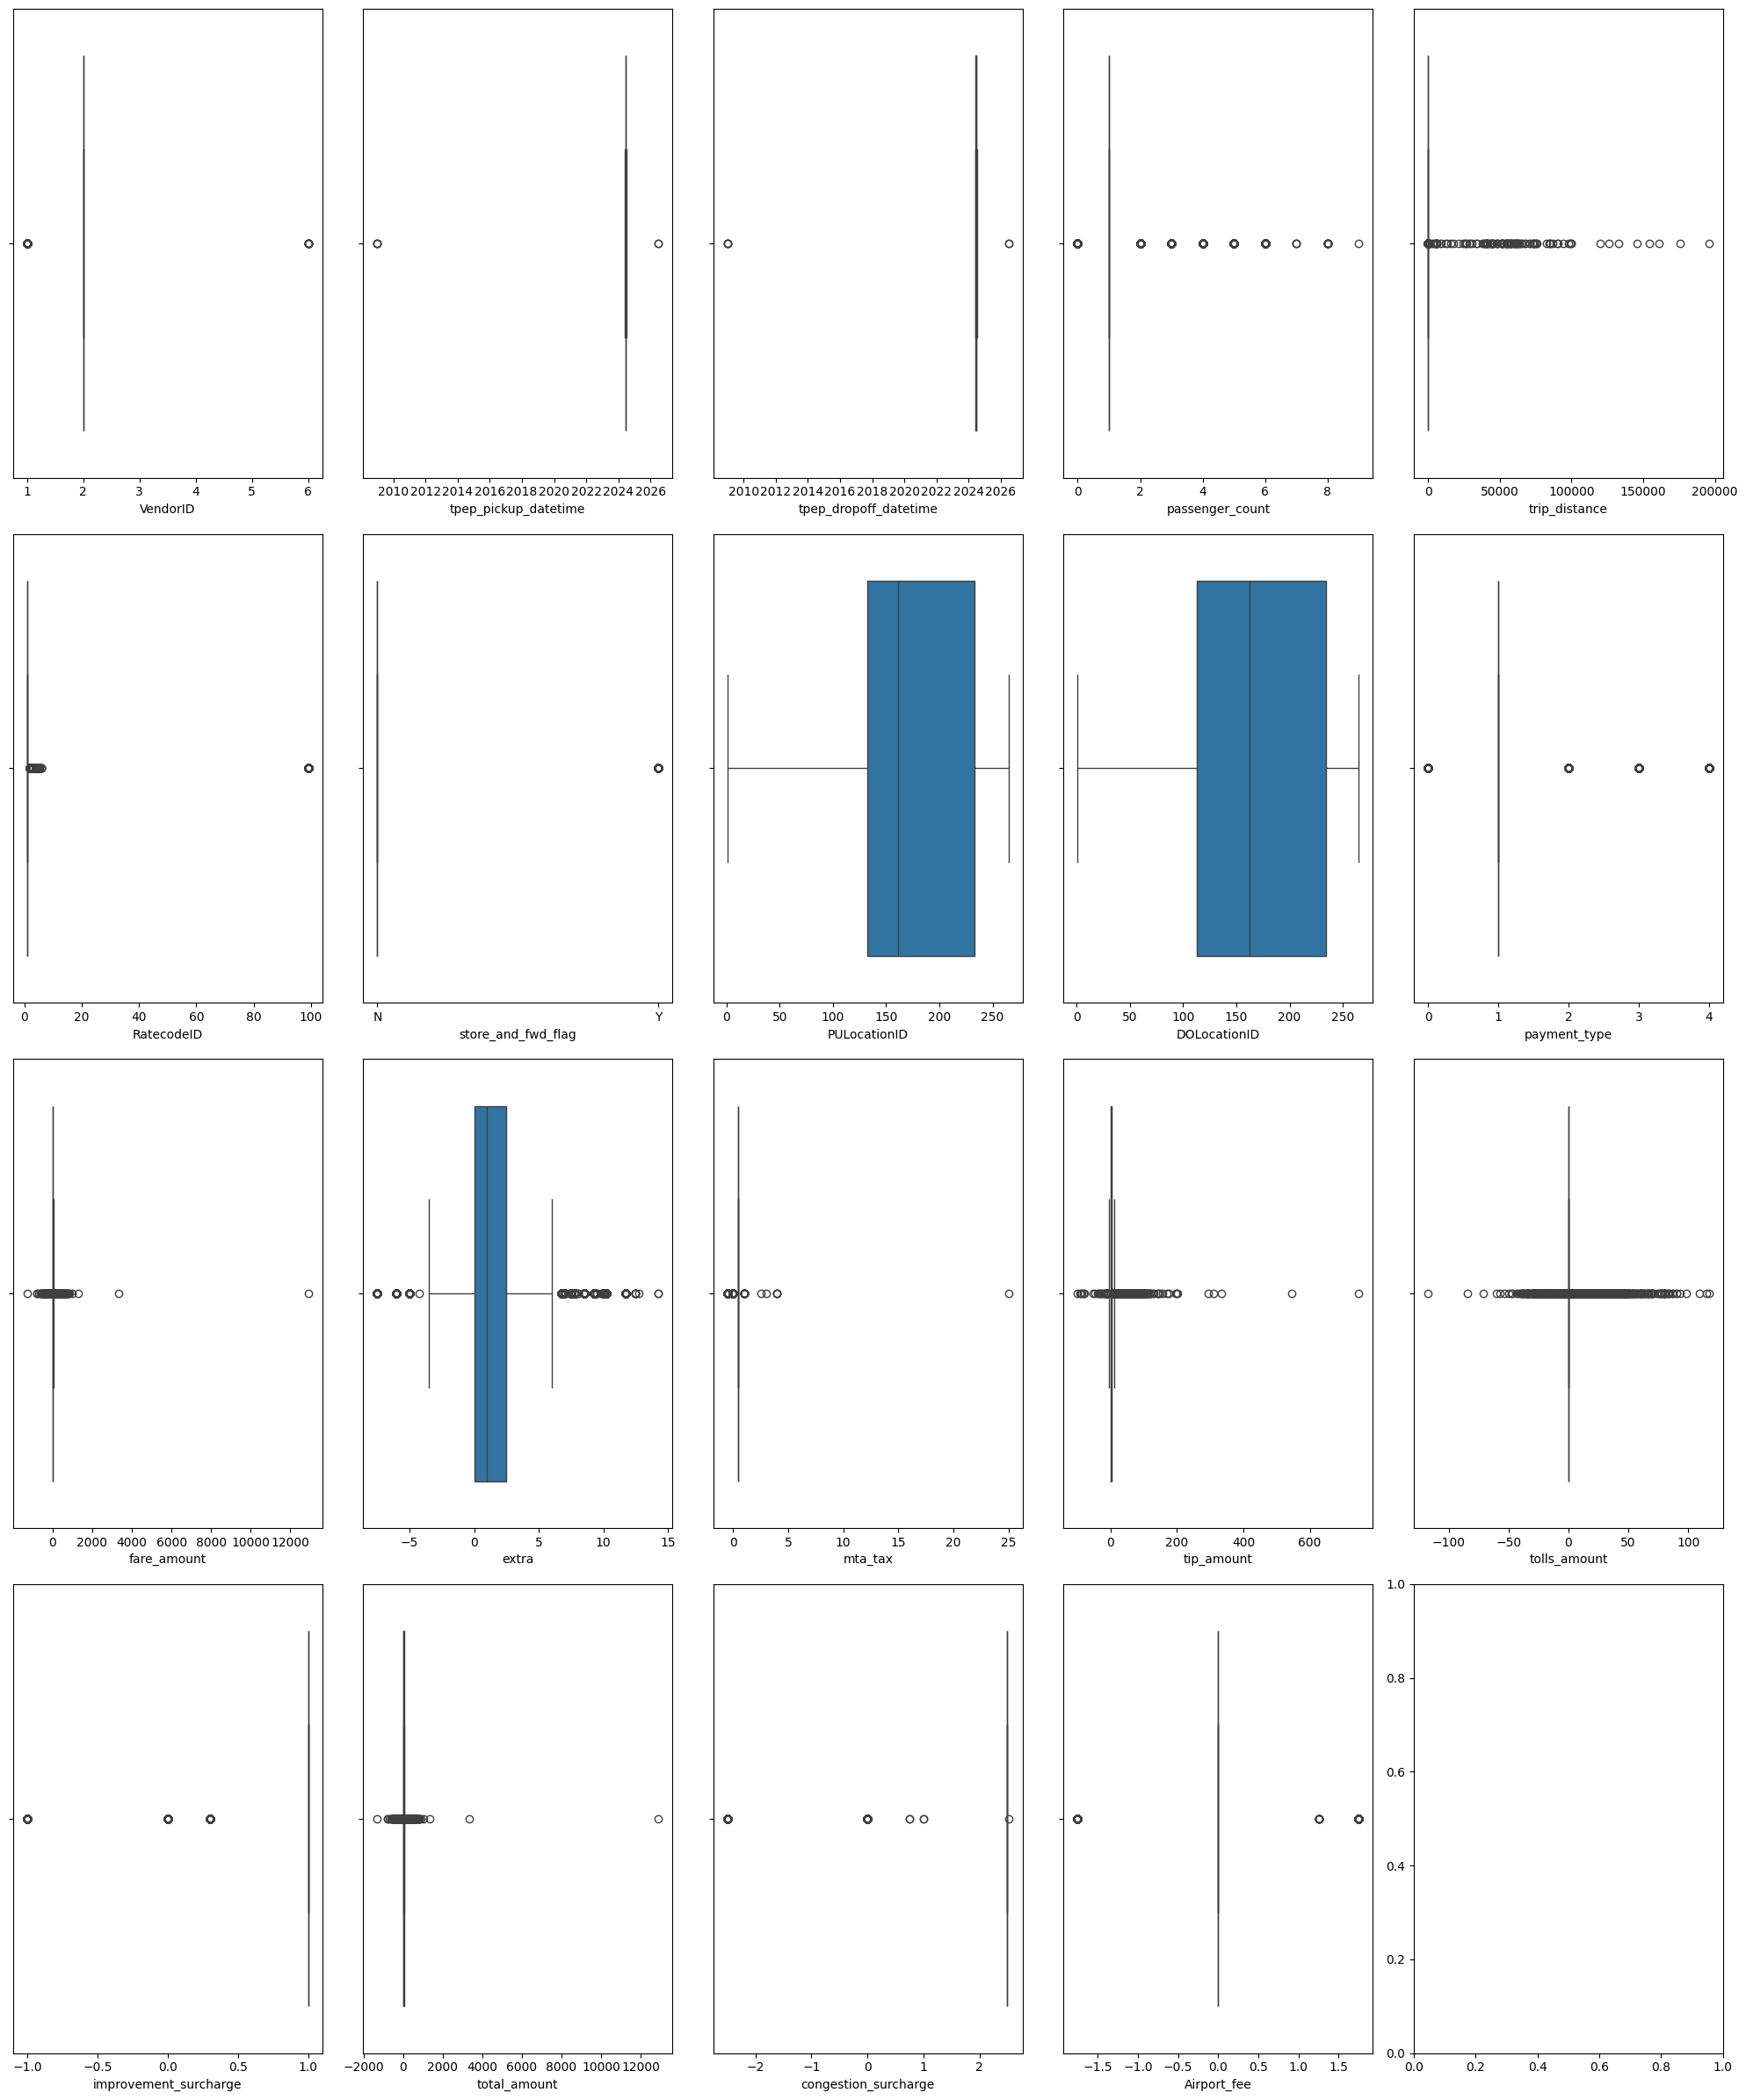

In [16]:
# Configurar la figura con X columnas y Y filas
fig, axes = plt.subplots(4, 5, figsize=(20, 24))
# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()
# Crear un boxplot para cada variable
for i, col in enumerate(df.columns[:20]):  # Asegúrate de tener 20 columnas
    sns.boxplot(data=df, x=col, ax=axes[i])
    # axes[i].set_title(col)
# Ajustar el layout para evitar solapamiento
plt.tight_layout()
# Mostrar el gráfico
plt.show()

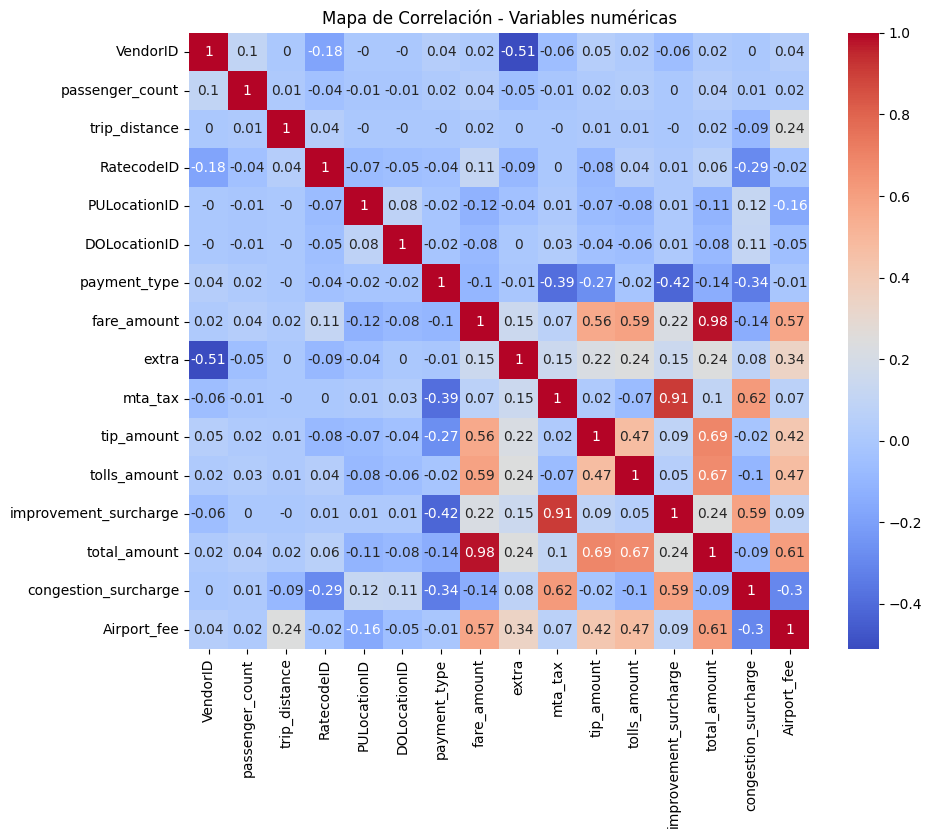

In [103]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

Se observa gran cantidad de datos que se correlacionan entre si:
1. La columna fare_amount, La tarifa de tiempo y distancia calculada por el taxímetro. tiene gran correlación con total_amount que significa el importe total que se cobrara, es lógico pensar que si existe mayor tarifa por tiempo y distancia en viaje, mayor tambien será la cantidad total a cobrar.
2. La columna Recargo por mejora de $0.30 en viajes evaluados al bajar la bandera. El recargo por mejora comenzó a cobrarse en 2015 (improvement_surcharge) con la columna Impuesto MTA de $0.50 que se activa automáticamente según el medidor tasa en uso tiene gran correlación positiva.
Esto por mencionar algunas:

Recordando que es importante quellas que tiene gran correlacion para poder aplicar un algoritmo de machine learning.



In [17]:
def graficar_conteo(colum):
    ret = df[colum].unique()
    if (len(df[colum].unique()) > 30):
        top_30 = df[colum].value_counts().nlargest(30)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_30.index, y=top_30.values, palette="bright")
        plt.xlabel(colum)
        plt.ylabel('Frecuencia')
        plt.title(f'Top 30 {colum}')
        plt.xticks(rotation=90) 
        plt.tight_layout()
        plt.show()
        return top_30
    else:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[colum], palette='bright')
        plt.xlabel(colum)
        plt.ylabel('Frecuencia')
        plt.title(f'{colum}')
        plt.xticks(rotation=90) 
        plt.show()
        return df[colum].value_counts()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


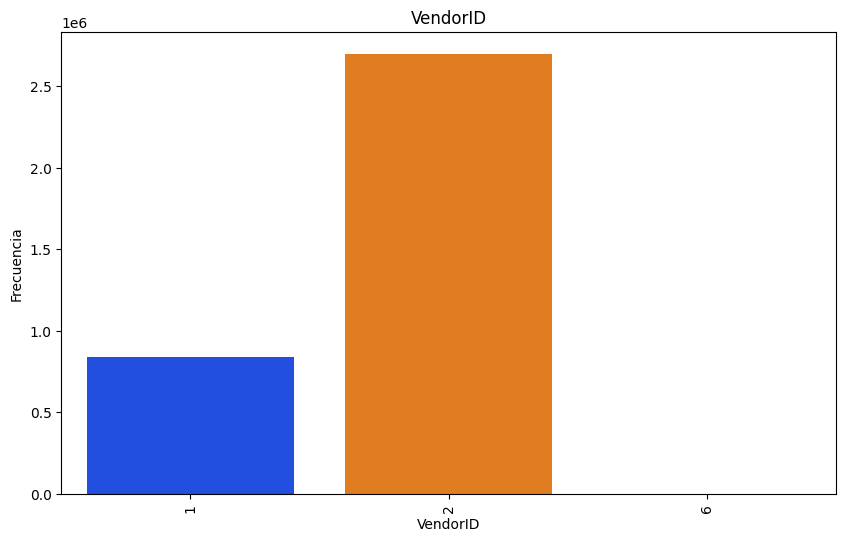

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


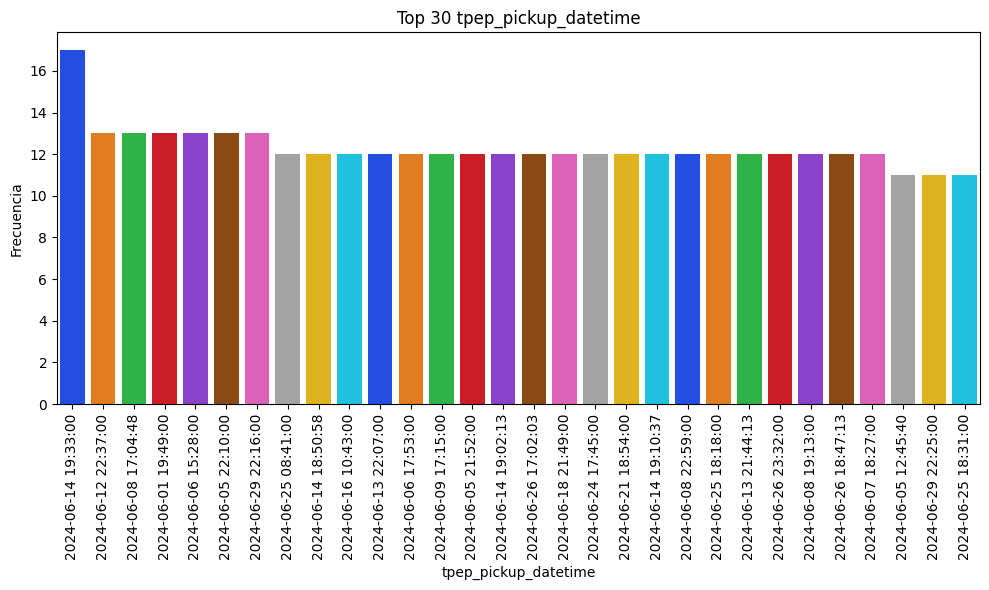

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


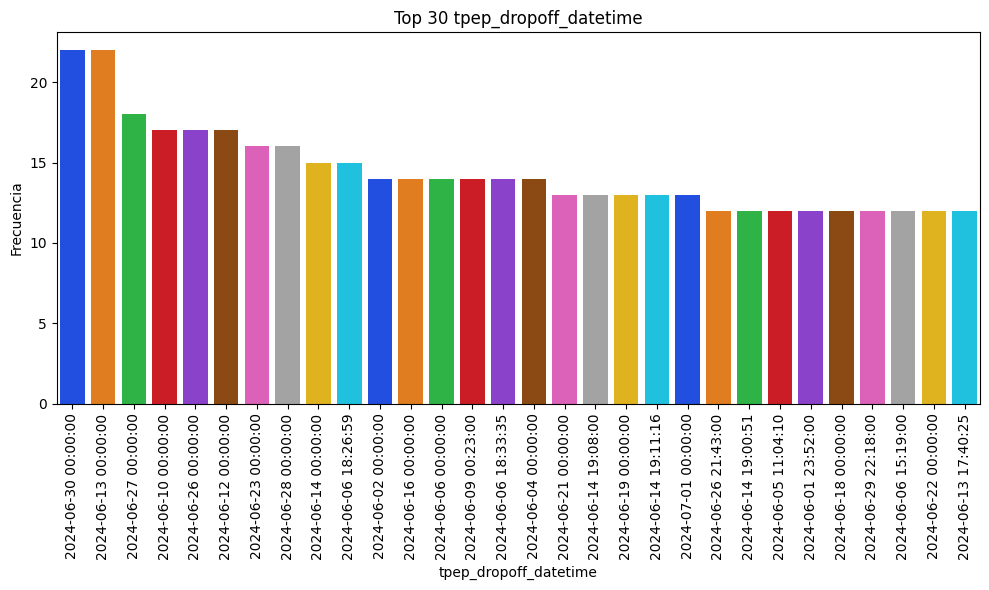

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


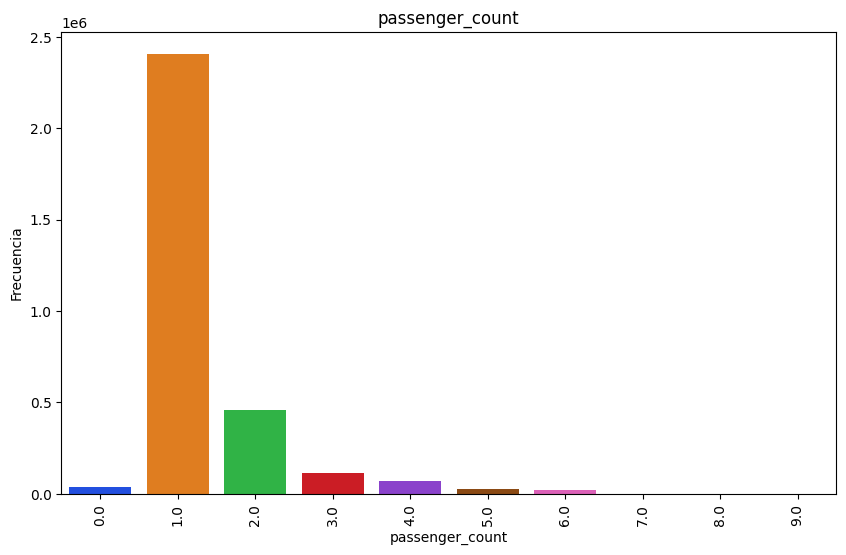

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


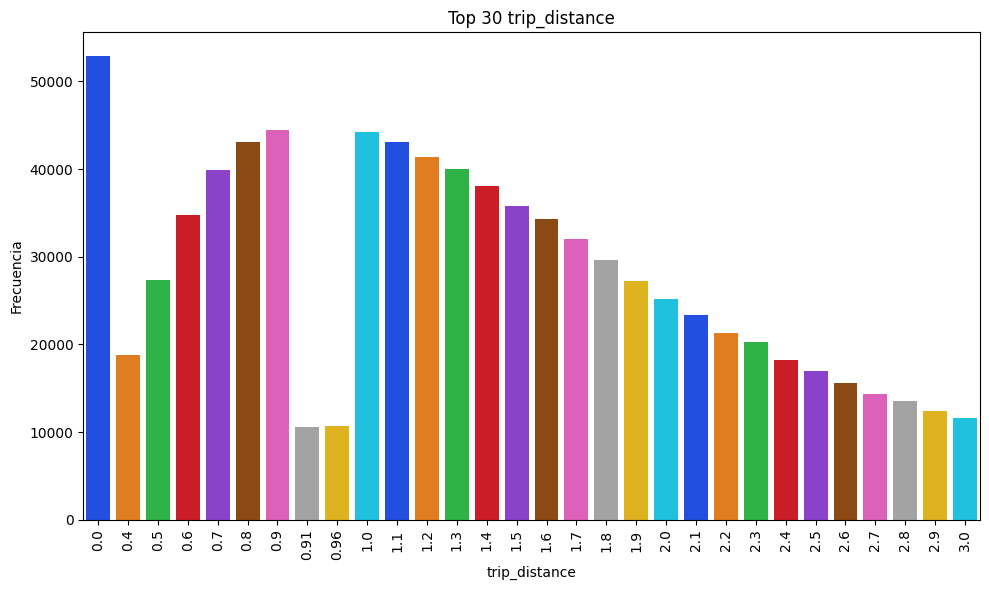

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


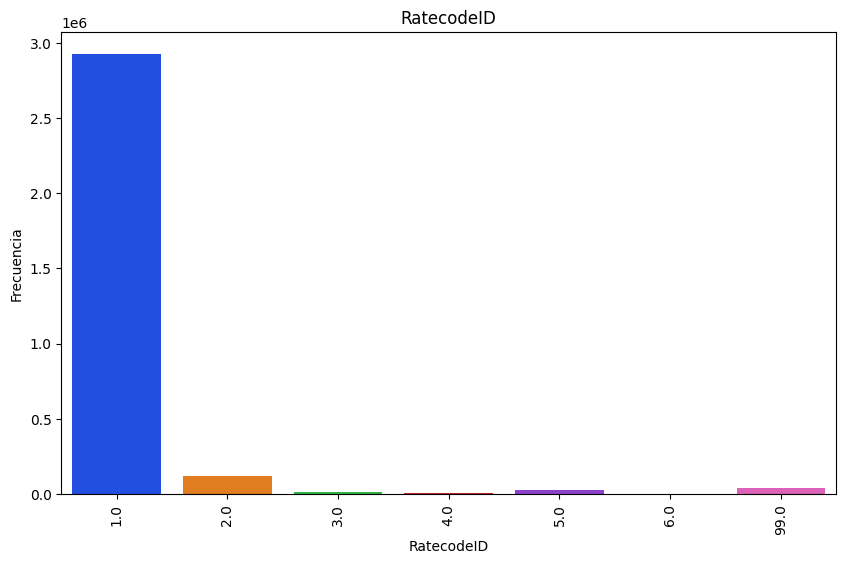

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


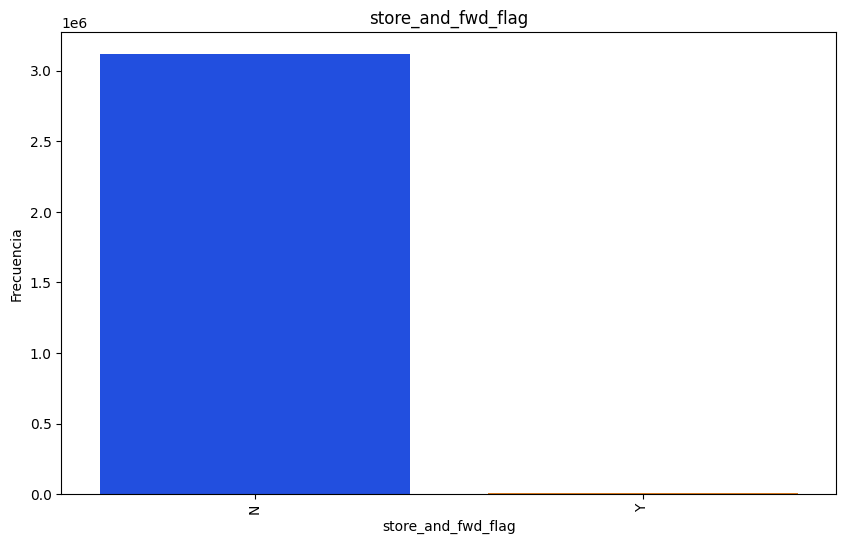

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


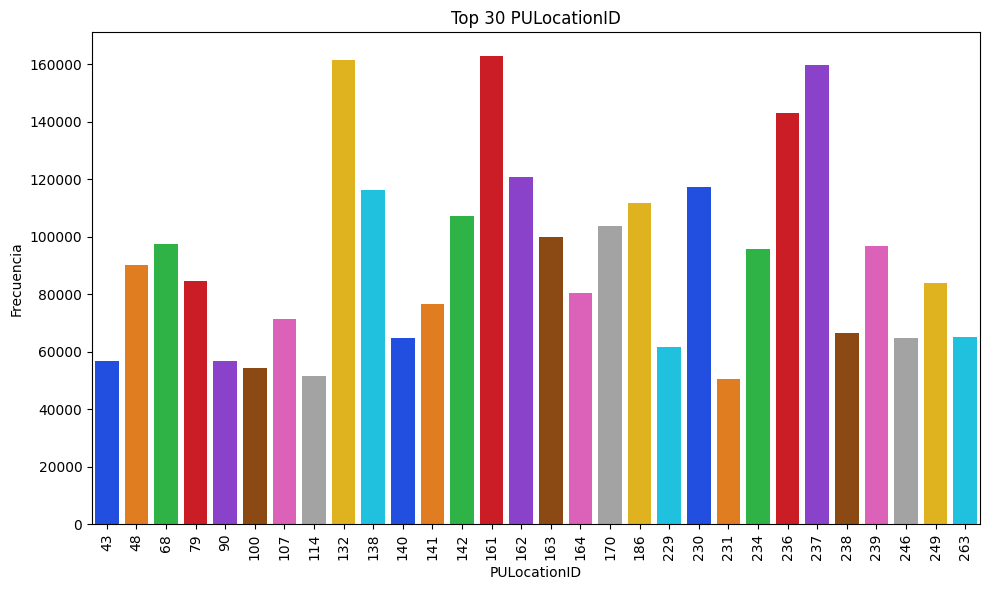

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


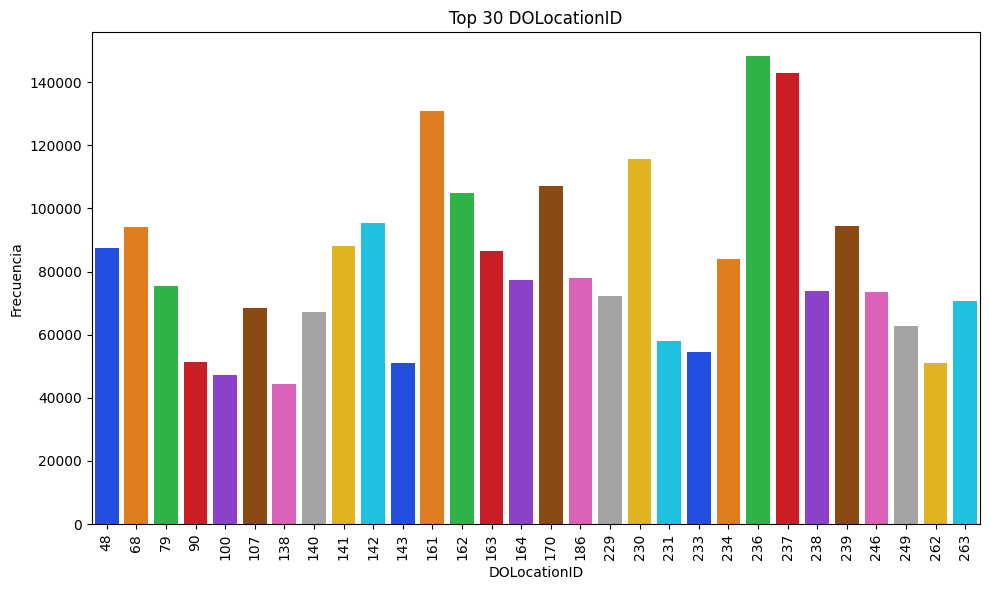

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


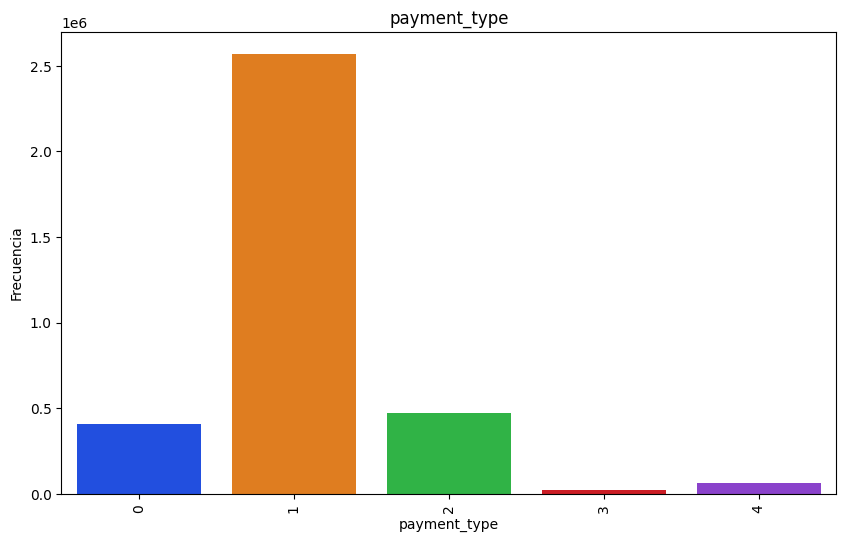

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


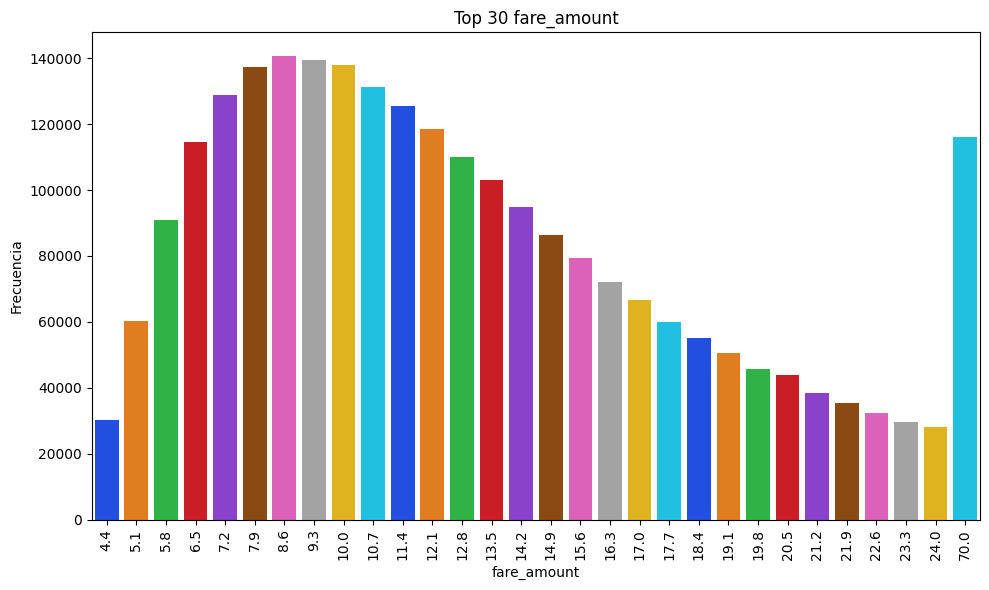

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


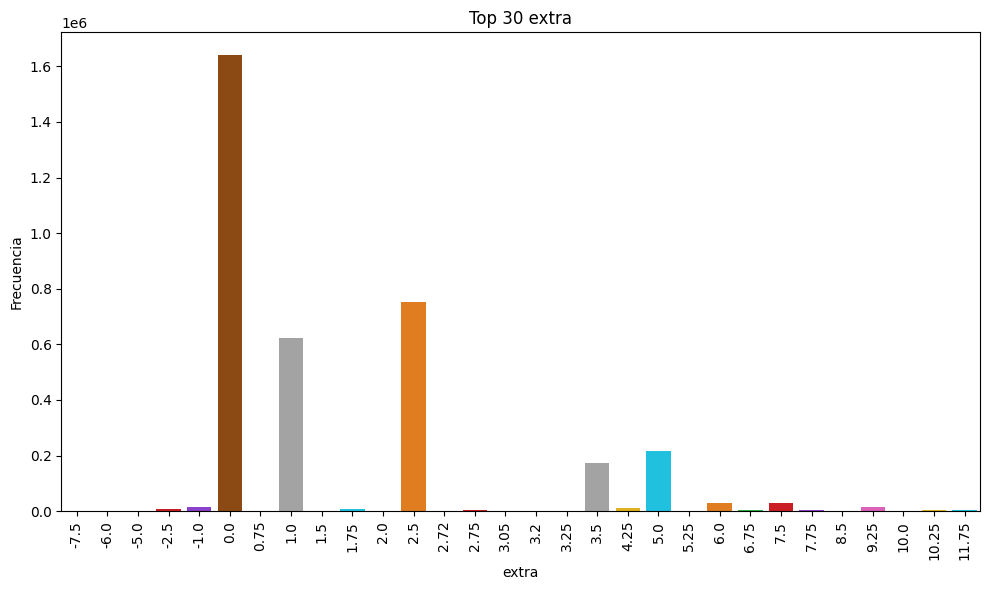

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


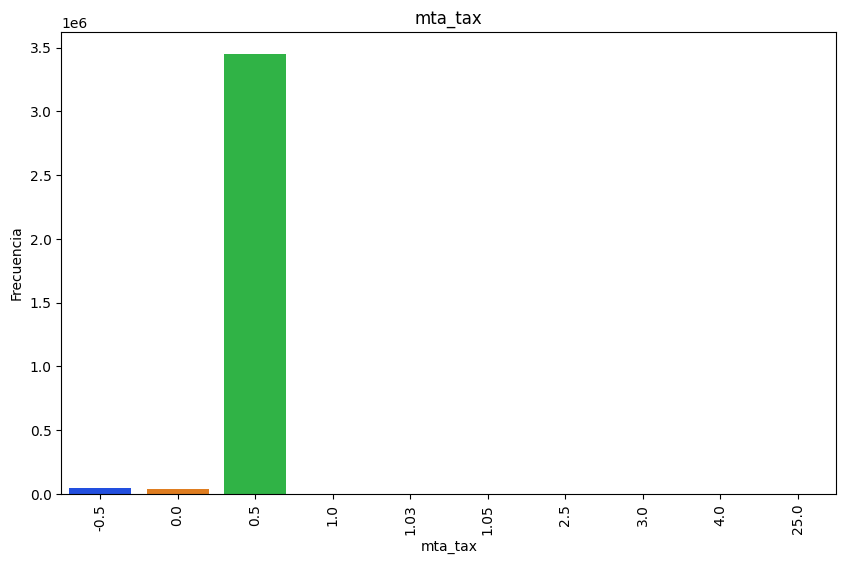

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


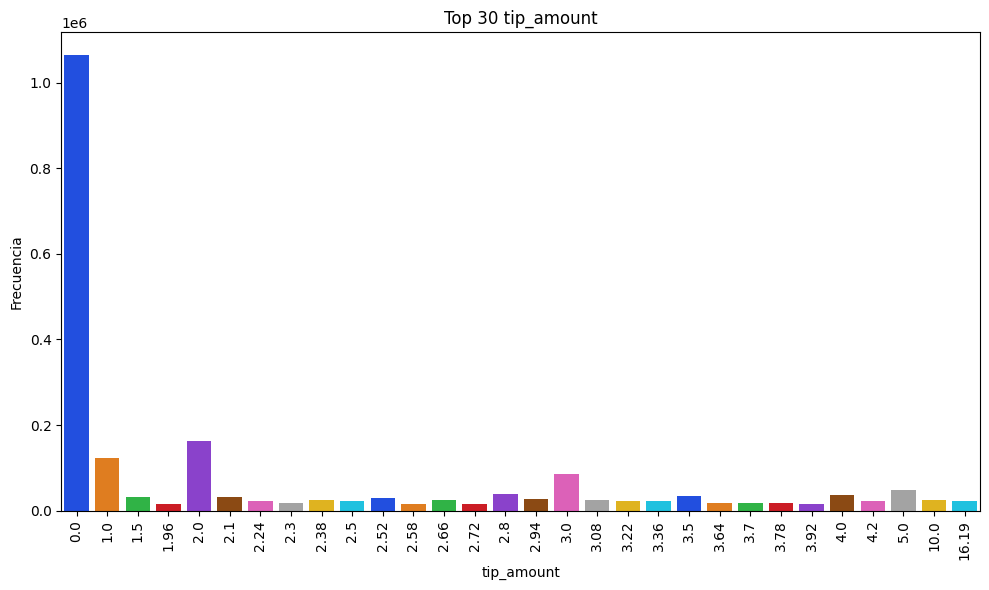

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


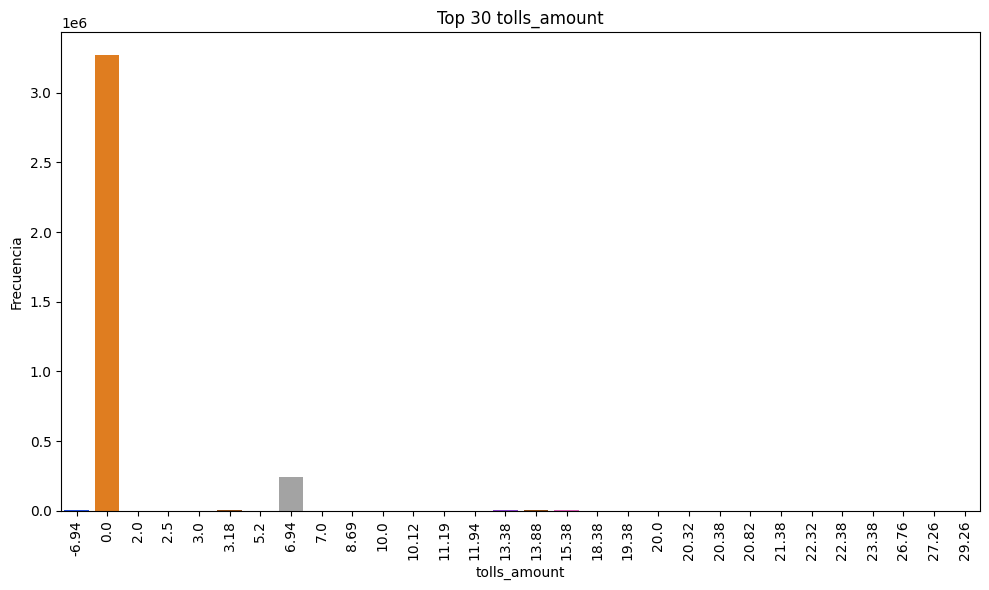

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


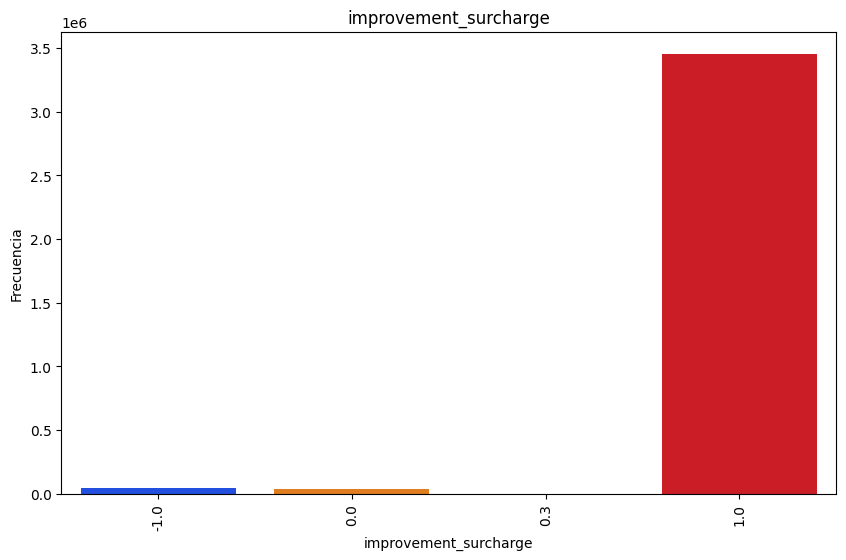

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


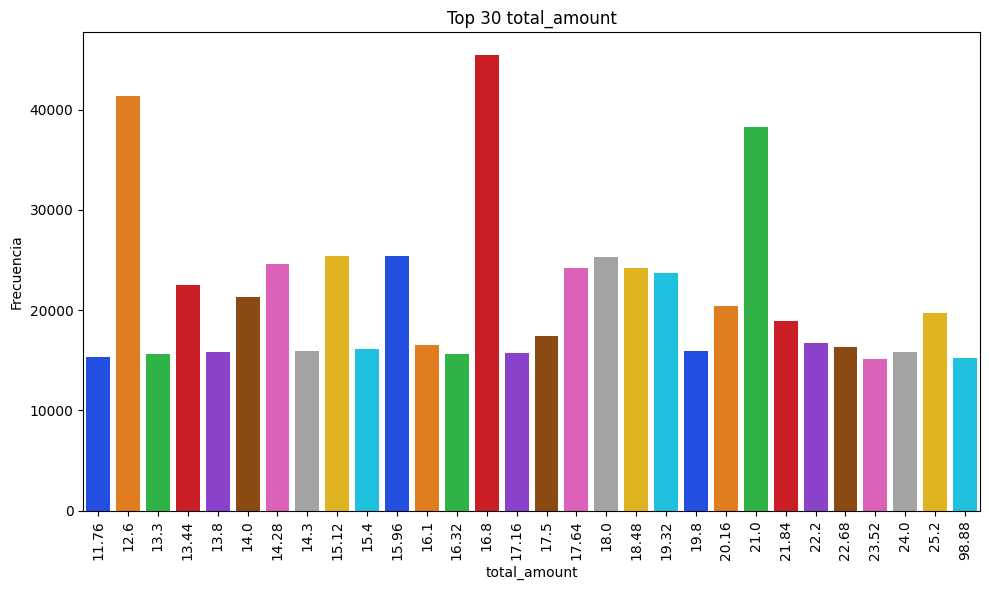

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


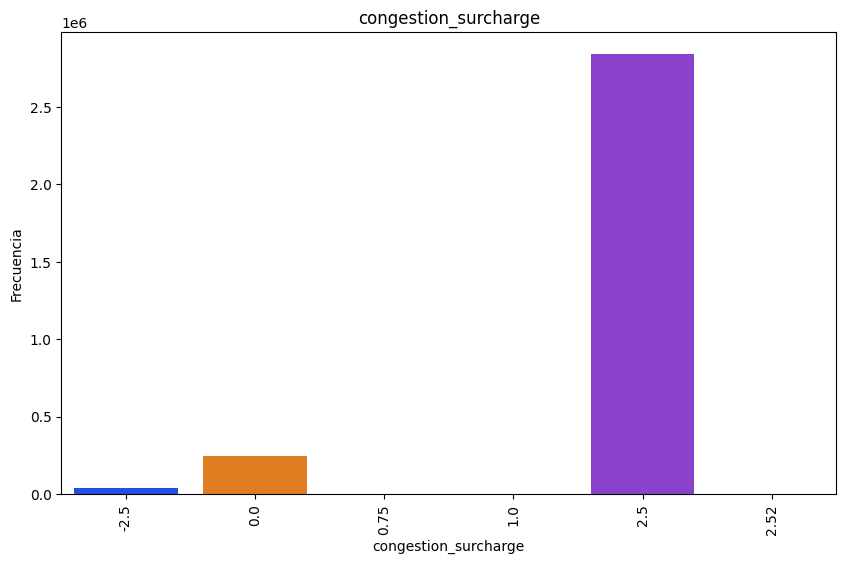

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


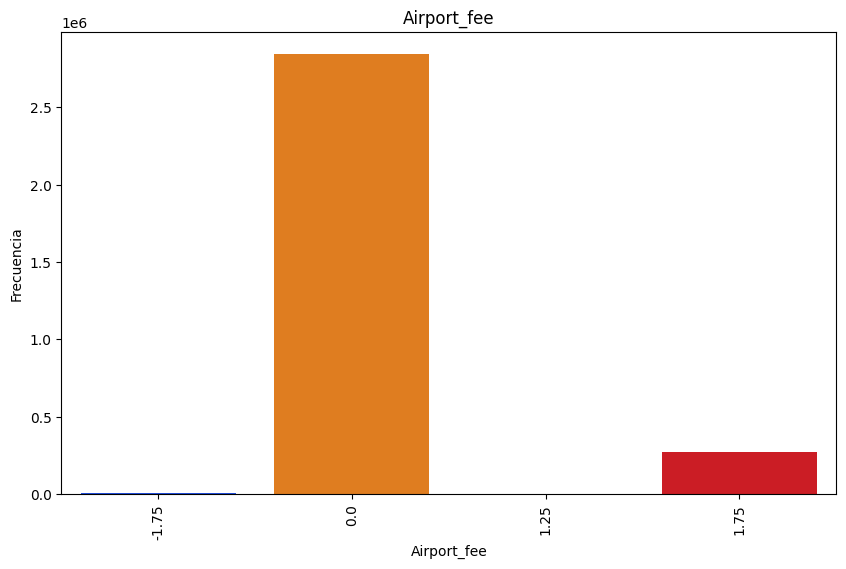

In [18]:
for colum in df.columns:
    graficar_conteo(colum)

In [19]:
df_junio = df

---
Datos de Mayo
---
---

In [21]:
df = carga_data_taxy_trip(2024, 5, 'yellow')

https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-05.parquet


In [22]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-05-01 00:59:15,2024-05-01 01:23:50,1.0,6.10,1.0,N,138,145,1,28.20,7.75,0.5,5.00,0.00,1.0,42.45,0.0,1.75
1,2,2024-04-30 23:58:26,2024-05-01 00:29:42,1.0,11.23,1.0,N,138,249,1,46.40,6.00,0.5,8.72,0.00,1.0,66.87,2.5,1.75
2,2,2024-05-01 00:57:17,2024-05-01 01:14:15,1.0,9.02,1.0,N,138,170,1,35.90,6.00,0.5,10.57,6.94,1.0,65.16,2.5,1.75
3,2,2024-05-01 00:24:47,2024-05-01 00:48:51,1.0,6.53,1.0,N,87,133,1,30.30,1.00,0.5,7.06,0.00,1.0,42.36,2.5,0.00
4,2,2024-05-01 00:11:20,2024-05-01 00:52:10,1.0,14.38,1.0,N,161,165,1,61.80,1.00,0.5,0.00,0.00,1.0,66.80,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723828,2,2024-05-31 23:45:00,2024-06-01 00:09:00,NaN,4.07,NaN,None,88,186,0,29.93,0.00,0.5,0.00,0.00,1.0,33.93,NaN,NaN
3723829,2,2024-05-31 23:10:52,2024-05-31 23:38:05,NaN,4.81,NaN,None,231,143,0,30.71,0.00,0.5,0.00,0.00,1.0,34.71,NaN,NaN
3723830,2,2024-05-31 23:23:57,2024-05-31 23:38:35,NaN,2.03,NaN,None,142,140,0,17.15,0.00,0.5,4.23,0.00,1.0,25.38,NaN,NaN
3723831,2,2024-05-31 23:44:12,2024-05-31 23:47:44,NaN,0.94,NaN,None,141,263,0,-1.00,0.00,0.5,0.00,0.00,1.0,3.00,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723833 entries, 0 to 3723832
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [25]:
# Obtener el conteo de nulos por columna de df
null_count = df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                        Nulos  Porcentaje
VendorID                    0    0.000000
tpep_pickup_datetime        0    0.000000
tpep_dropoff_datetime       0    0.000000
passenger_count        404666   10.866921
trip_distance               0    0.000000
RatecodeID             404666   10.866921
store_and_fwd_flag     404666   10.866921
PULocationID                0    0.000000
DOLocationID                0    0.000000
payment_type                0    0.000000
fare_amount                 0    0.000000
extra                       0    0.000000
mta_tax                     0    0.000000
tip_amount                  0    0.000000
tolls_amount                0    0.000000
improvement_surcharge       0    0.000000
total_amount                0    0.000000
congestion_surcharge   404666   10.866921
Airport_fee            404666   10.866921


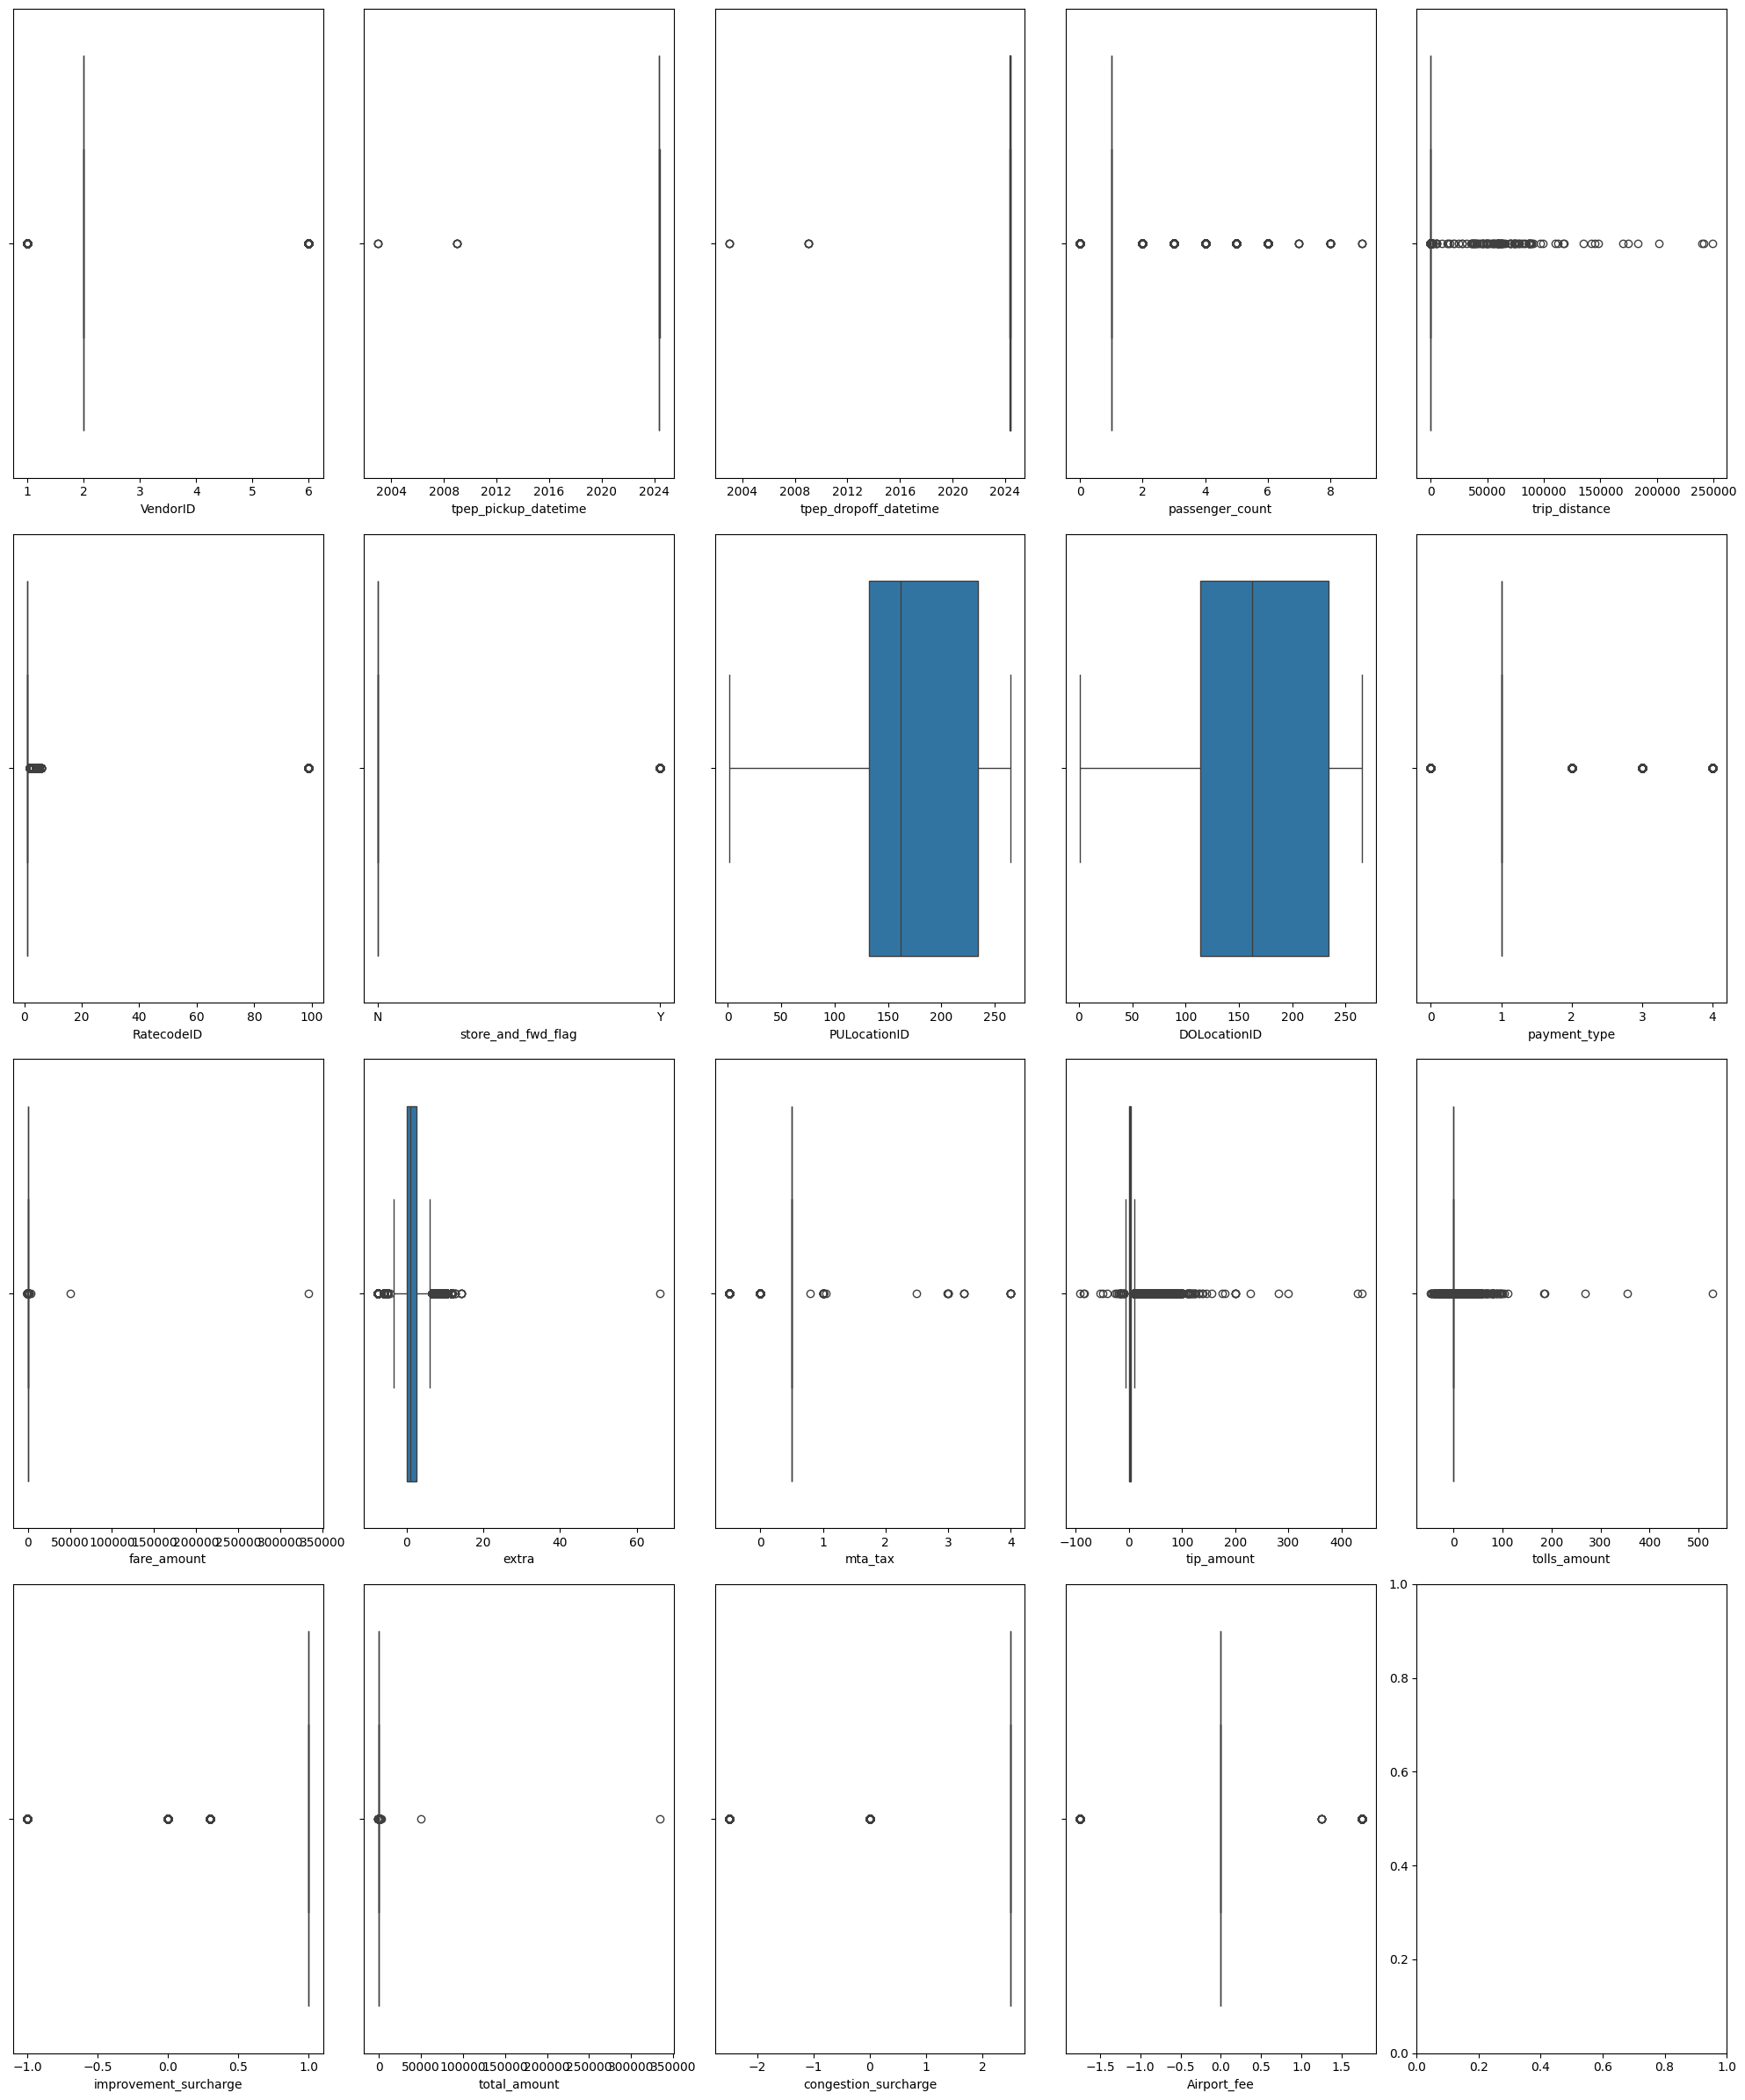

In [26]:
# Configurar la figura con X columnas y Y filas
fig, axes = plt.subplots(4, 5, figsize=(20, 24))
# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()
# Crear un boxplot para cada variable
for i, col in enumerate(df.columns[:20]):  # Asegúrate de tener 20 columnas
    sns.boxplot(data=df, x=col, ax=axes[i])
    # axes[i].set_title(col)
# Ajustar el layout para evitar solapamiento
plt.tight_layout()
# Mostrar el gráfico
plt.show()

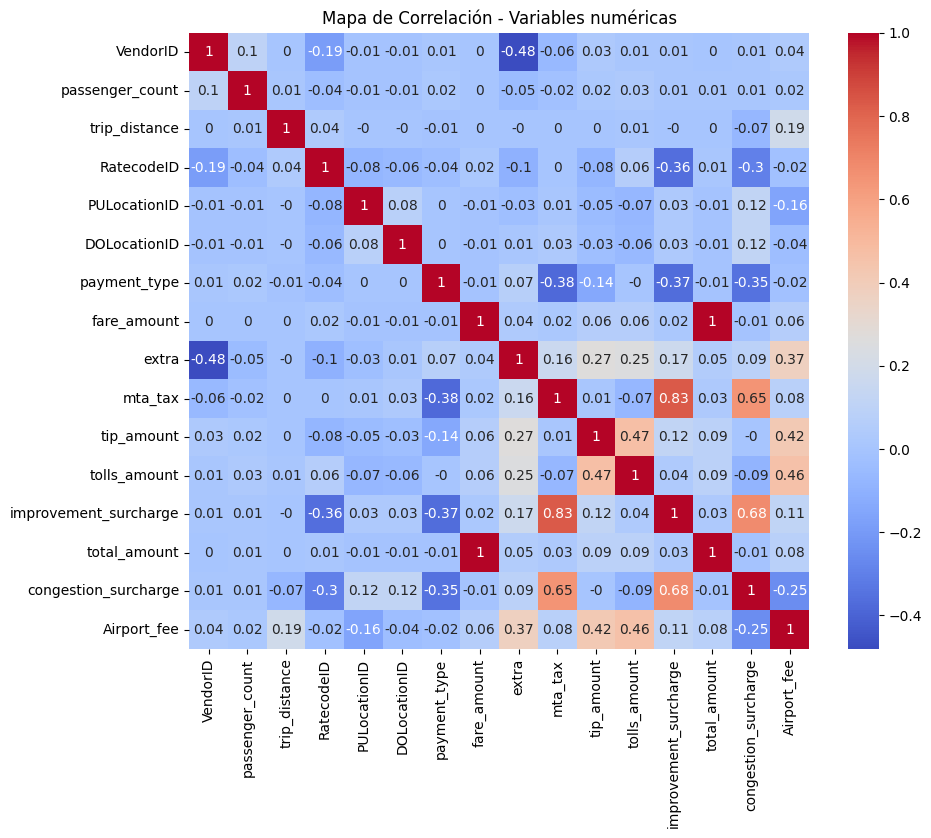

In [27]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

Las columnas que destacan son fare_amount que es el valor en moneda nacional que se cobra por el calculo de tiempo y distancia de uso del taxy (calculaedo por el taximetro) que se correalciona positivamente en 1.0 con el monto total que se cobra, es decirt despues de sumar propinas, taxes, entre otros.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


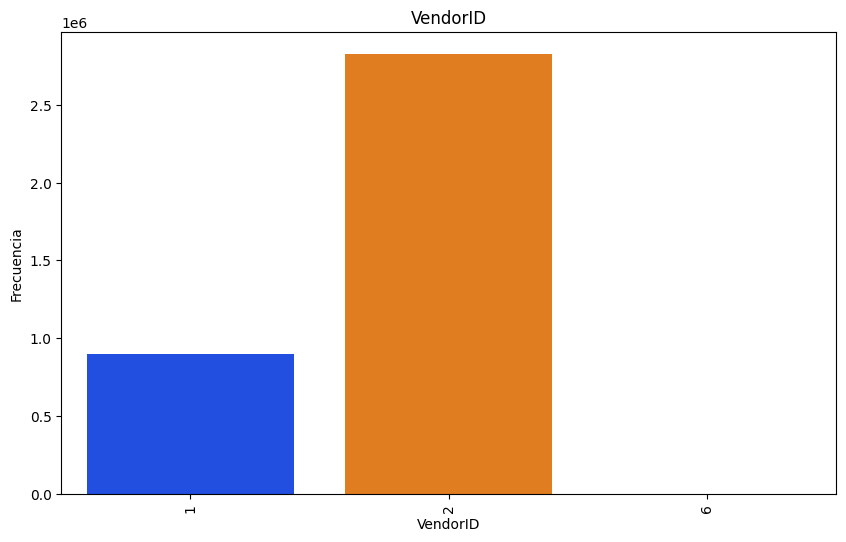

VendorID
2    2826700
1     896908
6        225
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


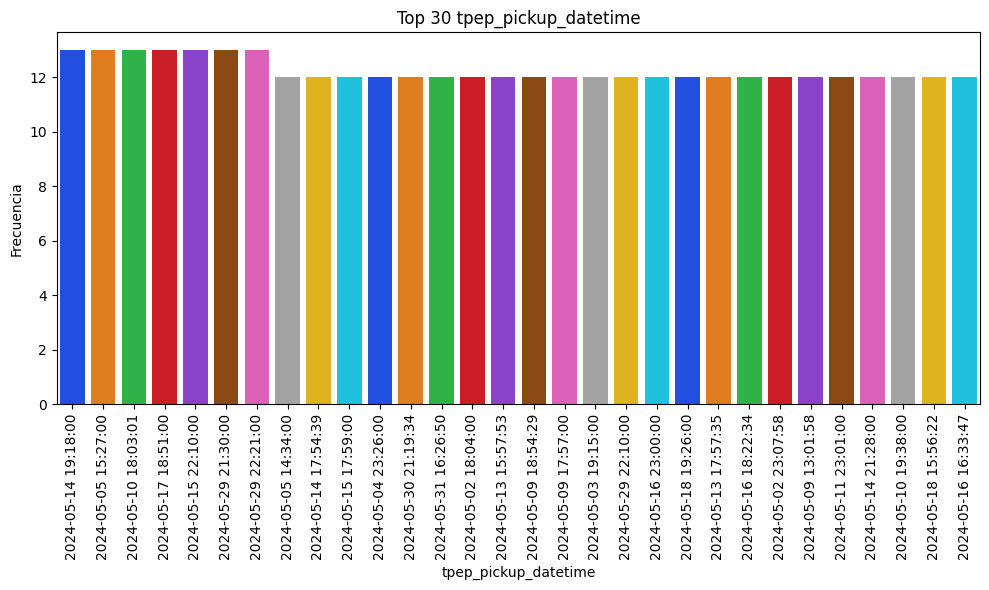

tpep_pickup_datetime
2024-05-14 19:18:00    13
2024-05-05 15:27:00    13
2024-05-10 18:03:01    13
2024-05-17 18:51:00    13
2024-05-15 22:10:00    13
2024-05-29 21:30:00    13
2024-05-29 22:21:00    13
2024-05-05 14:34:00    12
2024-05-14 17:54:39    12
2024-05-15 17:59:00    12
2024-05-04 23:26:00    12
2024-05-30 21:19:34    12
2024-05-31 16:26:50    12
2024-05-02 18:04:00    12
2024-05-13 15:57:53    12
2024-05-09 18:54:29    12
2024-05-09 17:57:00    12
2024-05-03 19:15:00    12
2024-05-29 22:10:00    12
2024-05-16 23:00:00    12
2024-05-18 19:26:00    12
2024-05-13 17:57:35    12
2024-05-16 18:22:34    12
2024-05-02 23:07:58    12
2024-05-09 13:01:58    12
2024-05-11 23:01:00    12
2024-05-14 21:28:00    12
2024-05-10 19:38:00    12
2024-05-18 15:56:22    12
2024-05-16 16:33:47    12
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


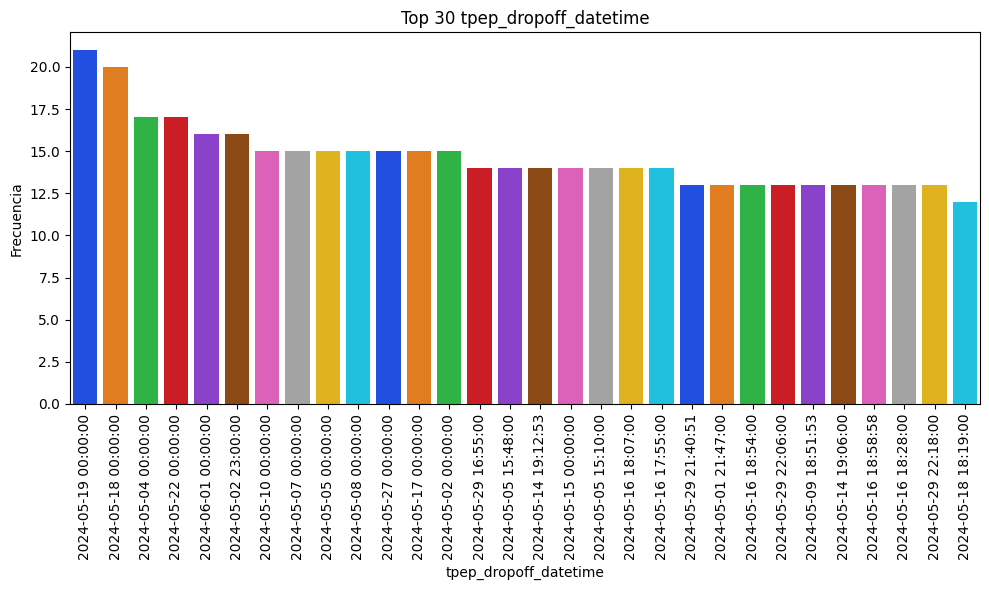

tpep_dropoff_datetime
2024-05-19 00:00:00    21
2024-05-18 00:00:00    20
2024-05-04 00:00:00    17
2024-05-22 00:00:00    17
2024-06-01 00:00:00    16
2024-05-02 23:00:00    16
2024-05-10 00:00:00    15
2024-05-07 00:00:00    15
2024-05-05 00:00:00    15
2024-05-08 00:00:00    15
2024-05-27 00:00:00    15
2024-05-17 00:00:00    15
2024-05-02 00:00:00    15
2024-05-29 16:55:00    14
2024-05-05 15:48:00    14
2024-05-14 19:12:53    14
2024-05-15 00:00:00    14
2024-05-05 15:10:00    14
2024-05-16 18:07:00    14
2024-05-16 17:55:00    14
2024-05-29 21:40:51    13
2024-05-01 21:47:00    13
2024-05-16 18:54:00    13
2024-05-29 22:06:00    13
2024-05-09 18:51:53    13
2024-05-14 19:06:00    13
2024-05-16 18:58:58    13
2024-05-16 18:28:00    13
2024-05-29 22:18:00    13
2024-05-18 18:19:00    12
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


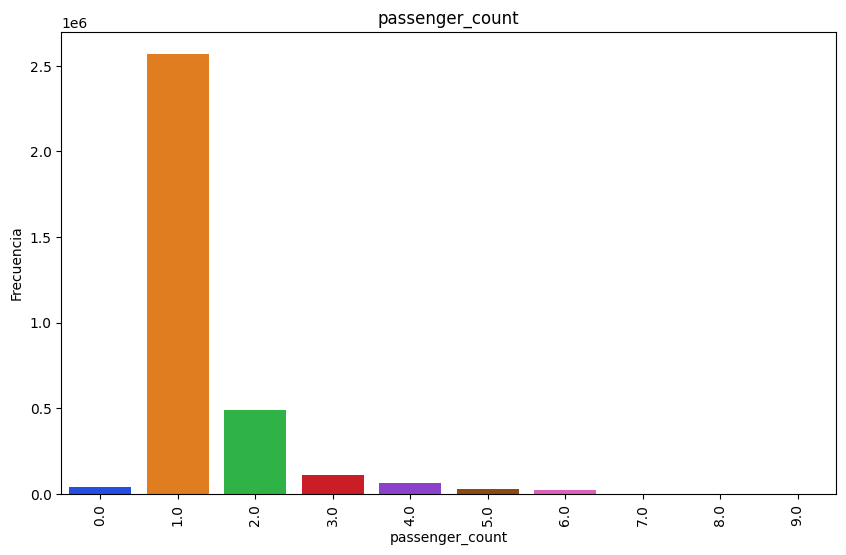

passenger_count
1.0    2570334
2.0     488079
3.0     108153
4.0      62902
0.0      39748
5.0      30021
6.0      19905
8.0         18
7.0          4
9.0          3
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


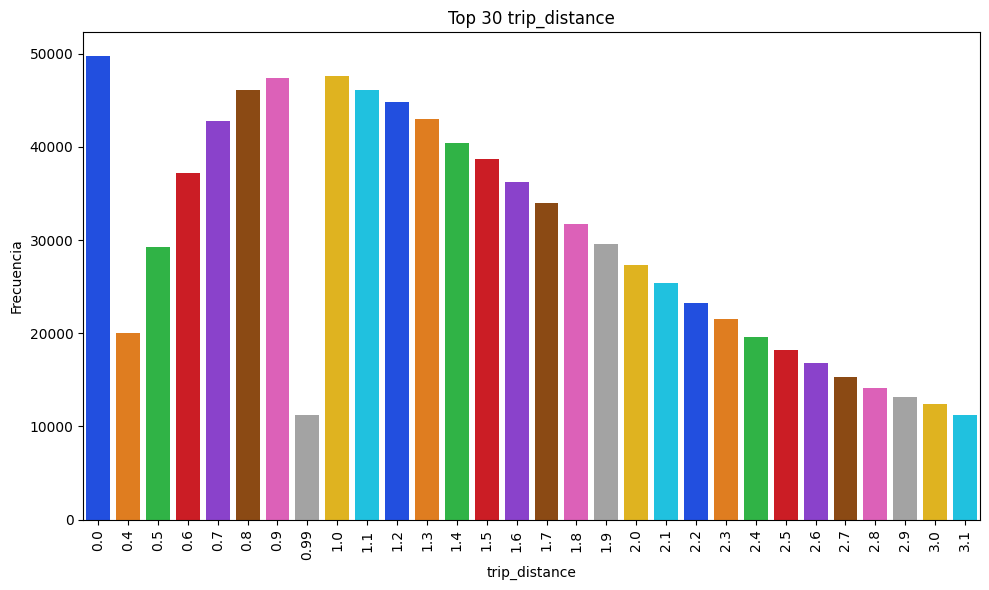

trip_distance
0.00    49791
1.00    47610
0.90    47422
0.80    46129
1.10    46120
1.20    44783
1.30    42956
0.70    42757
1.40    40361
1.50    38679
0.60    37230
1.60    36244
1.70    33995
1.80    31678
1.90    29559
0.50    29241
2.00    27362
2.10    25410
2.20    23267
2.30    21492
0.40    20028
2.40    19606
2.50    18214
2.60    16810
2.70    15311
2.80    14101
2.90    13183
3.00    12415
0.99    11265
3.10    11254
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


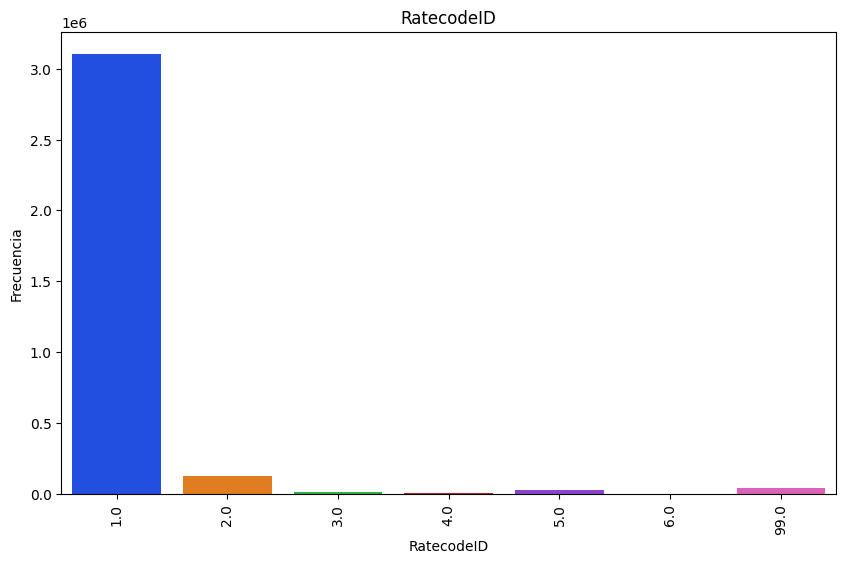

RatecodeID
1.0     3104562
2.0      127557
99.0      40934
5.0       26018
3.0       11872
4.0        8215
6.0           9
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


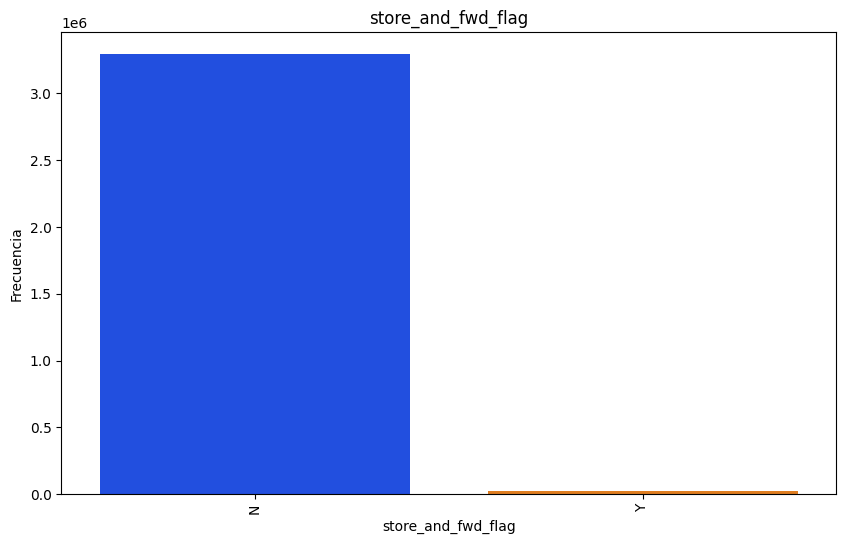

store_and_fwd_flag
N    3292625
Y      26542
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


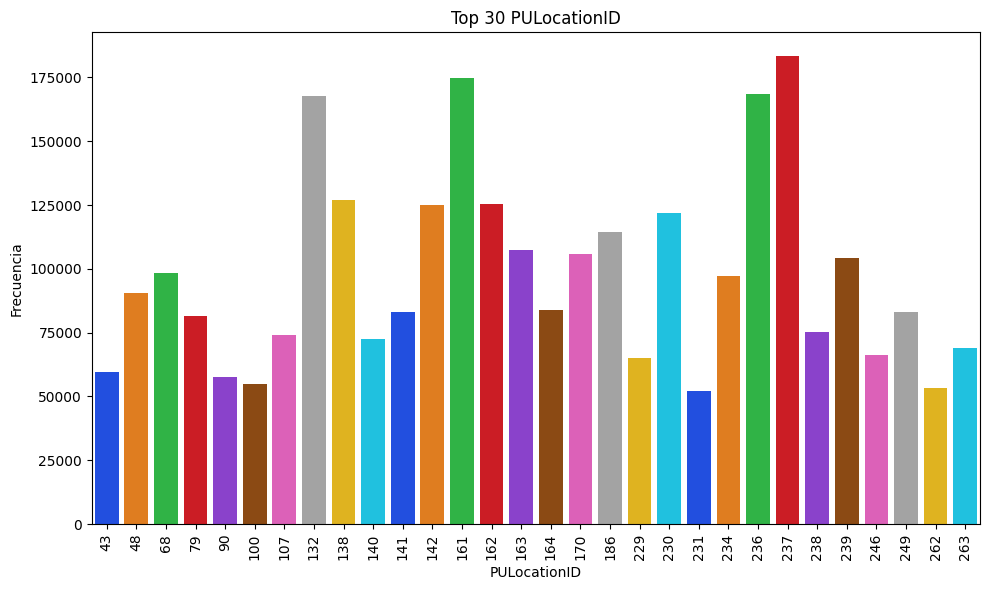

PULocationID
237    183490
161    174675
236    168379
132    167546
138    127137
162    125417
142    124892
230    121996
186    114356
163    107303
170    105752
239    104128
68      98385
234     97080
48      90583
164     83783
249     83090
141     82916
79      81615
238     75237
107     73901
140     72429
263     68898
246     66120
229     65165
43      59770
90      57815
100     54744
262     53377
231     52018
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


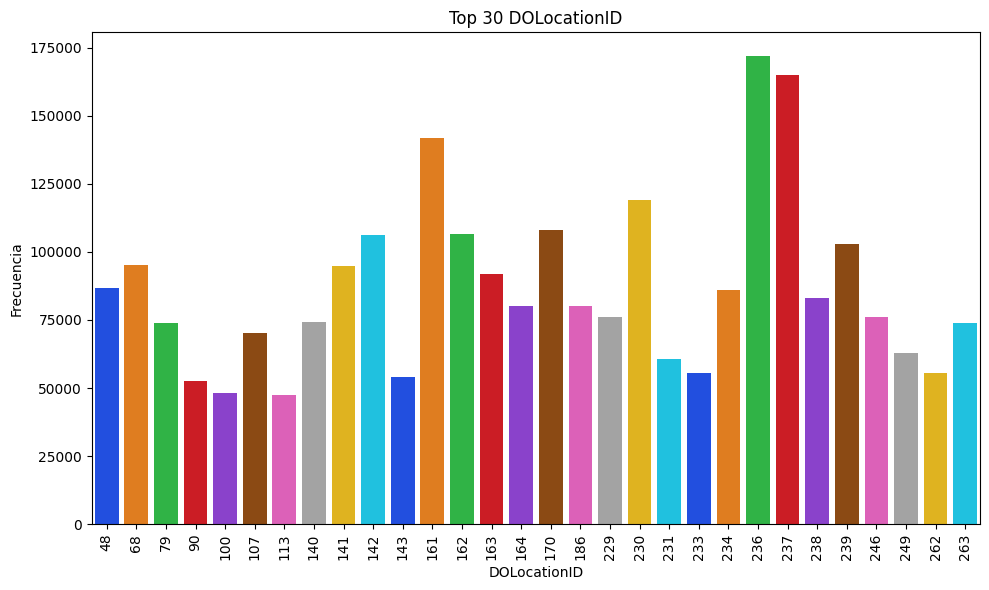

DOLocationID
236    172072
237    165143
161    141823
230    119124
170    108171
162    106543
142    106372
239    102809
68      95180
141     94888
163     91985
48      86682
234     86137
238     83176
164     80126
186     79973
229     76250
246     76093
140     74122
263     74034
79      73708
107     70259
249     62991
231     60691
233     55621
262     55587
143     54116
90      52632
100     48100
113     47556
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


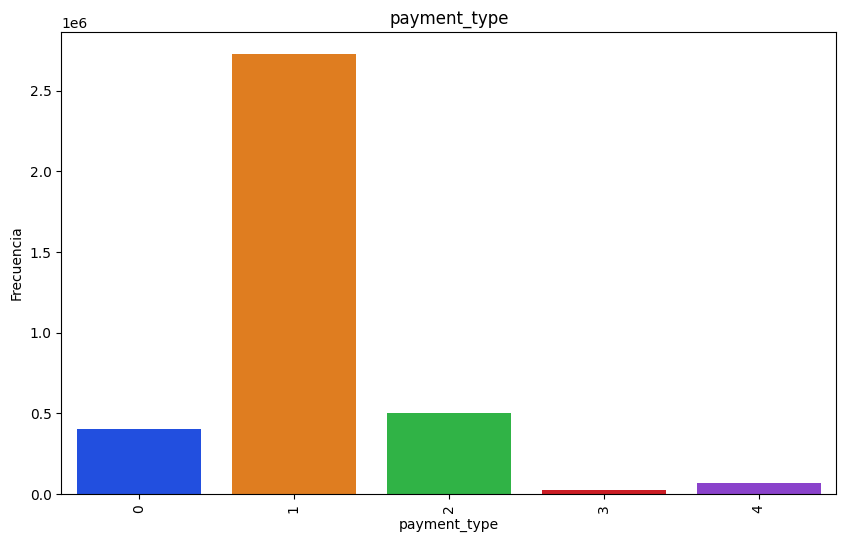

payment_type
1    2727878
2     502495
0     404666
4      64300
3      24494
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


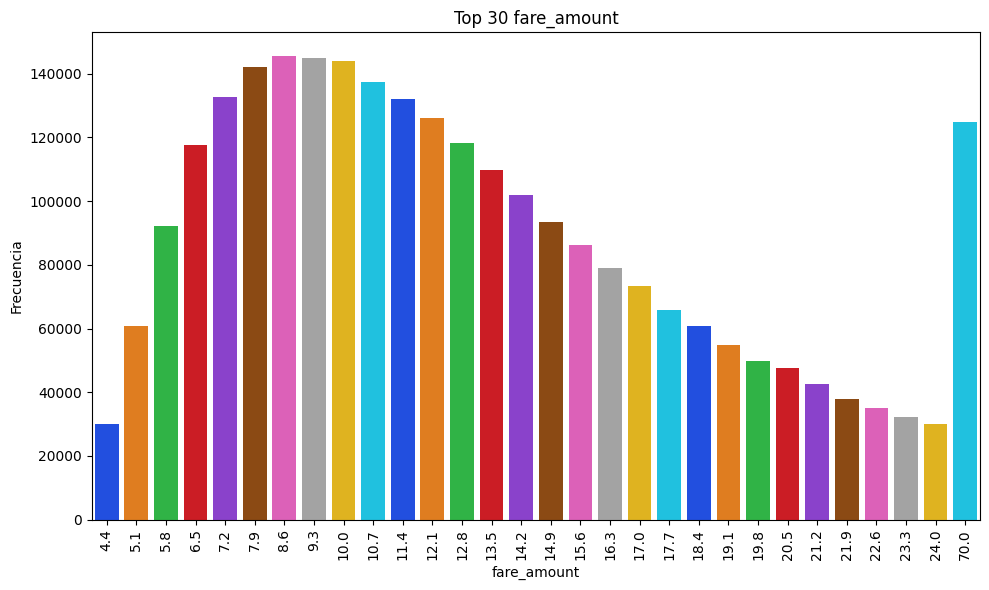

fare_amount
8.6     145723
9.3     144845
10.0    143866
7.9     142074
10.7    137478
7.2     132787
11.4    131996
12.1    125973
70.0    124771
12.8    118132
6.5     117759
13.5    109809
14.2    102069
14.9     93491
5.8      92158
15.6     86356
16.3     78948
17.0     73389
17.7     65797
5.1      60919
18.4     60741
19.1     54827
19.8     49876
20.5     47721
21.2     42468
21.9     37933
22.6     35122
23.3     32128
24.0     29973
4.4      29873
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


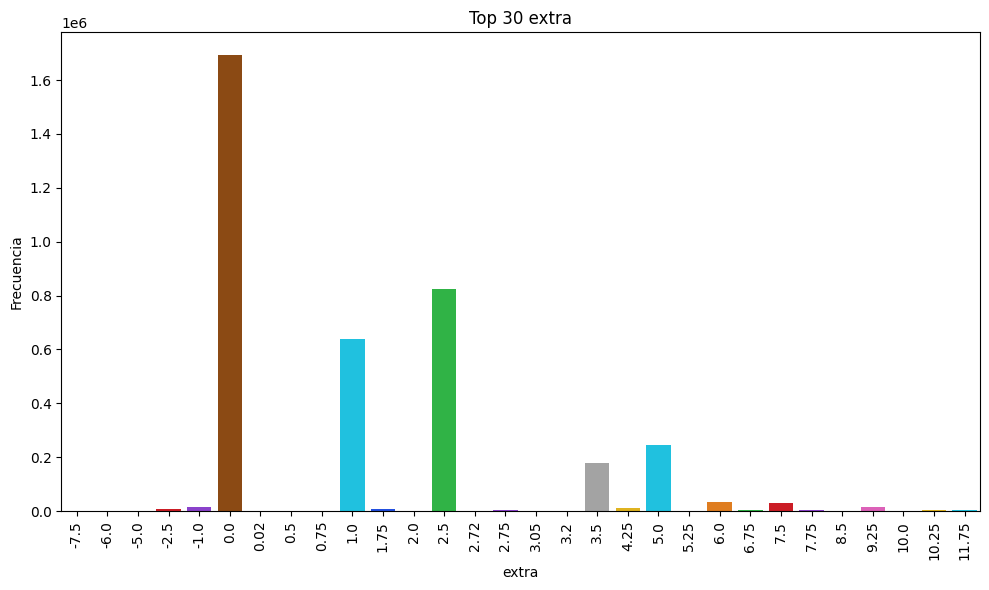

extra
 0.00     1692795
 2.50      823859
 1.00      640758
 5.00      245126
 3.50      178084
 6.00       32412
 7.50       31473
 9.25       14970
-1.00       13830
 4.25       11035
-2.50        7885
 1.75        5993
 6.75        5562
 10.25       4256
 2.75        3582
 7.75        3473
 11.75       3408
-5.00        2021
 10.00       1039
 8.50         710
-6.00         655
-7.50         367
 2.00         157
 0.50          72
 3.05          52
 3.20          36
 5.25          35
 0.75          27
 2.72          24
 0.02          11
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


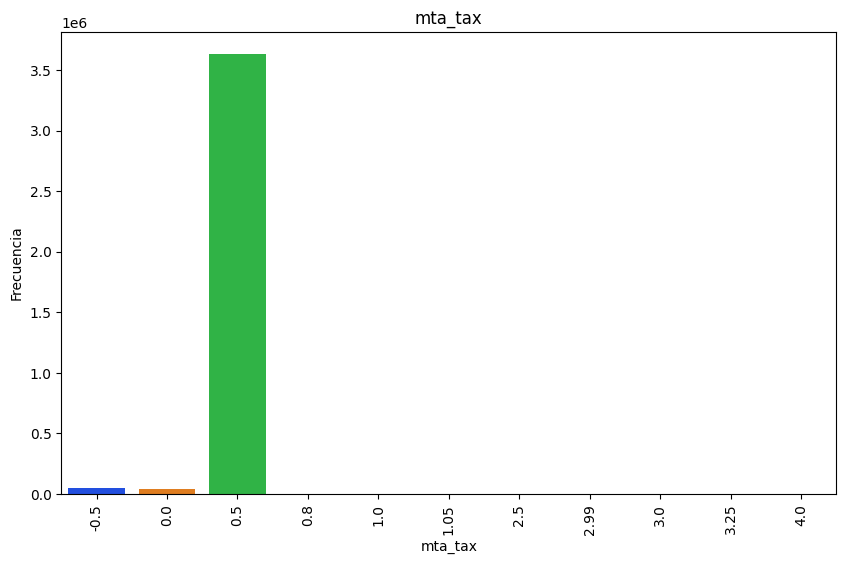

mta_tax
 0.50    3634554
-0.50      47271
 0.00      41960
 1.00         31
 4.00          7
 3.25          3
 3.00          3
 2.50          1
 0.80          1
 1.05          1
 2.99          1
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


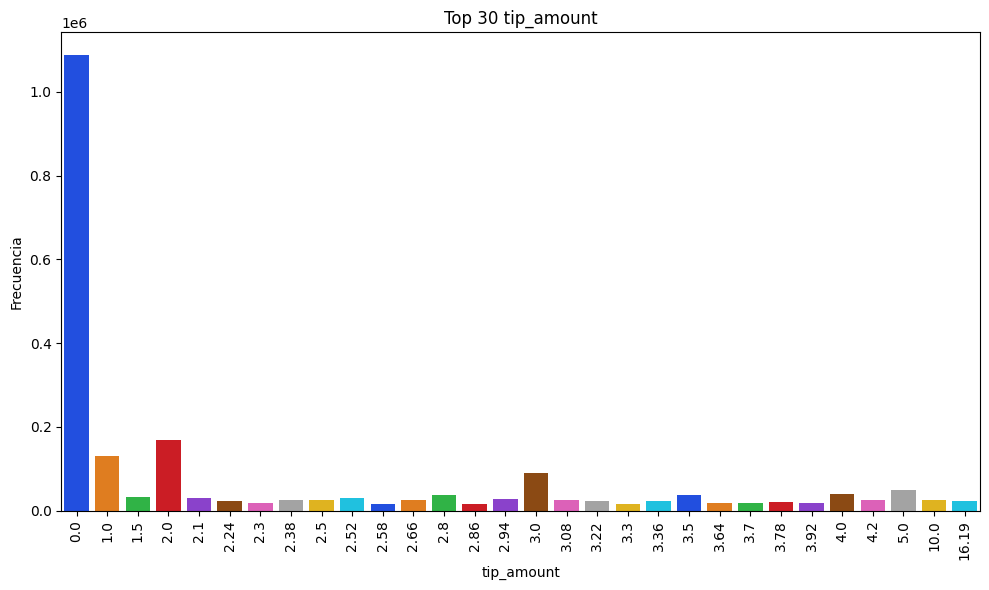

tip_amount
0.00     1087536
2.00      168170
1.00      129617
3.00       89820
5.00       50544
4.00       39321
2.80       38307
3.50       36578
1.50       33226
2.10       30958
2.52       29764
2.94       27460
2.66       25939
2.50       25313
10.00      25164
3.08       25131
2.38       25027
4.20       24454
3.36       24203
16.19      23849
3.22       23723
2.24       23402
3.78       20447
3.64       19102
3.70       18478
3.92       18033
2.30       17829
3.30       17139
2.58       16484
2.86       16429
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


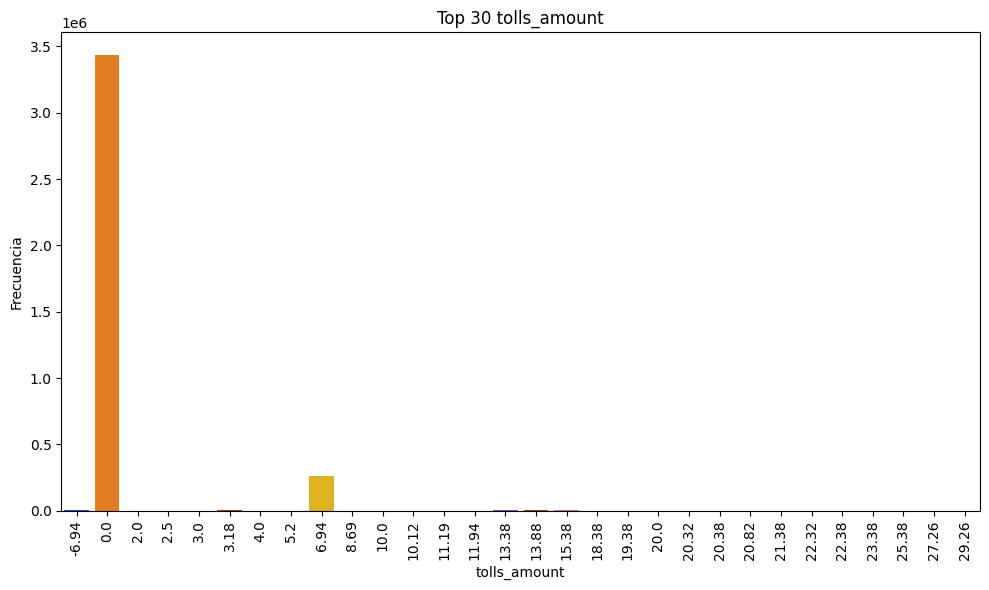

tolls_amount
 0.00     3433952
 6.94      261883
 13.38       4052
-6.94        3309
 15.38       3261
 3.18        1910
 13.88       1707
 20.32        719
 5.20         569
 22.32        538
 2.00         475
 21.38        401
 20.38        391
 11.19        332
 20.82        274
 19.38        274
 22.38        268
 23.38        268
 11.94        262
 18.38        257
 3.00         240
 20.00        219
 2.50         202
 27.26        177
 10.12        170
 8.69         156
 25.38        147
 10.00        143
 29.26        143
 4.00         142
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


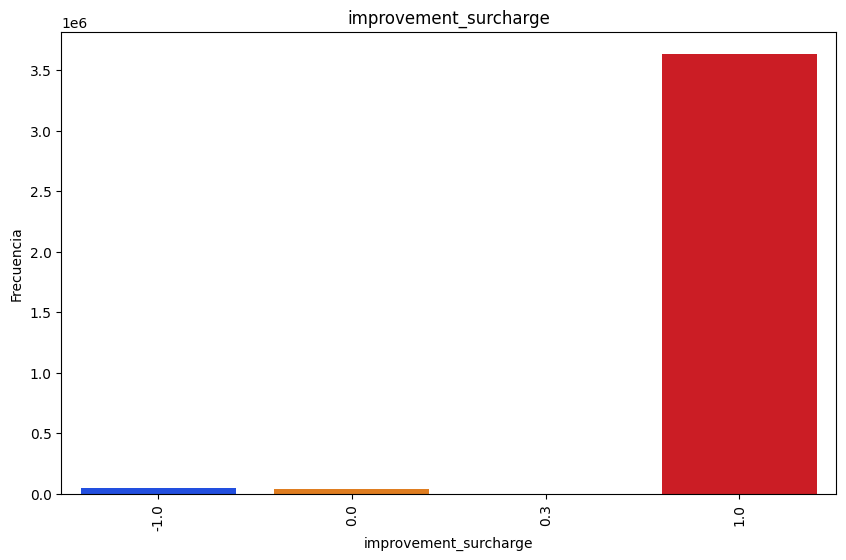

improvement_surcharge
 1.0    3637077
-1.0      48966
 0.0      37186
 0.3        604
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30.index, y=top_30.values, palette="bright")


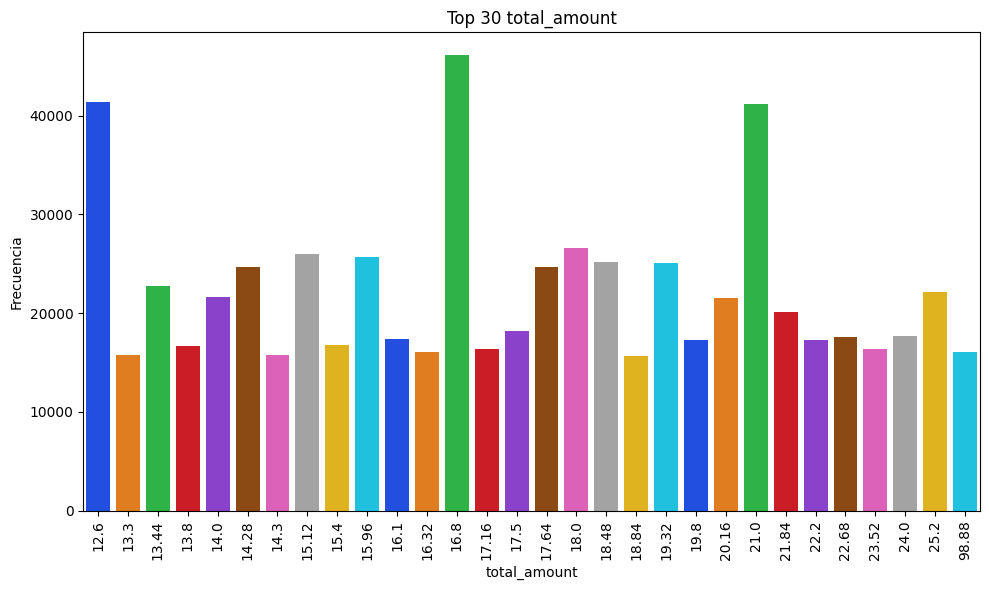

total_amount
16.80    46140
12.60    41364
21.00    41171
18.00    26632
15.12    26000
15.96    25707
18.48    25215
19.32    25130
17.64    24704
14.28    24637
13.44    22763
25.20    22109
14.00    21627
20.16    21516
21.84    20163
17.50    18247
24.00    17741
22.68    17575
16.10    17350
19.80    17250
22.20    17239
15.40    16808
13.80    16720
17.16    16425
23.52    16369
16.32    16034
98.88    16027
14.30    15819
13.30    15742
18.84    15649
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


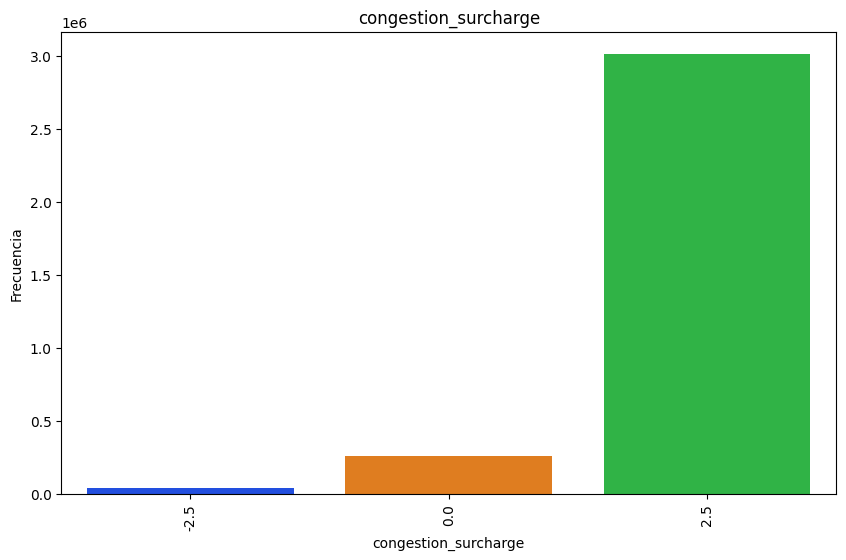

congestion_surcharge
 2.5    3016706
 0.0     262481
-2.5      39980
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_27300\1856429625.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[colum], palette='bright')


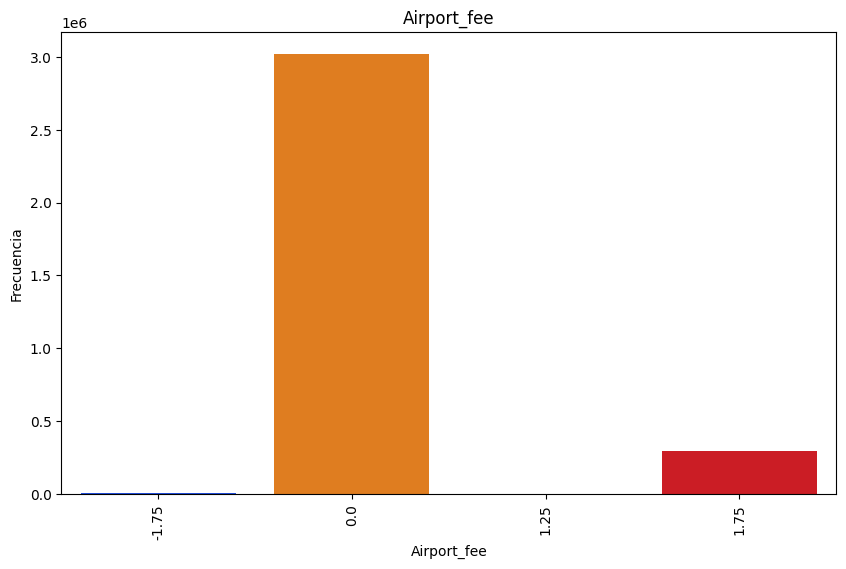

Airport_fee
 0.00    3019345
 1.75     292139
-1.75       7677
 1.25          6
Name: count, dtype: int64


In [28]:
for colum in df.columns:
    print(graficar_conteo(colum))